# PROJET 6 - SEGMENTATION AUTOMATIQUE DE BIENS DE CONSOMMATION
***

In [1]:
import os, sys, time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import nltk
from pandarallel import pandarallel

#chemin de data nltk
nltk.data.path.append('/home/adrien/devcode/python/datalib/nltk_data/')

In [3]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from wordcloud import WordCloud

In [4]:
#On initialise pandarallel

pandarallel.initialize(progress_bar = True, nb_workers = 12)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## 1 - ANALYSE EXPLORATOIRE
***

In [14]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv', sep = ',')

In [6]:
data.head(3)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   
1  No rating available  No rating available  Sathiyas   
2  No rating available  No rating available   Eurospa   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...

In [7]:
data.tail(3)

uniq_id            crawl_timestamp  \
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1190.0             595.0  f2f027ad6a6df617c9f125173da71e44.jpg   

      is_FK_Advantage_product  \
1047                    False   
1048                    False   
1049                    False   

                                            description       product_rating  \
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  No rating available   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  No rating available   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...                    4   

           overall_rating       brand  \
1047  No rating available    Uberlyfe   
1048  No rating available  Wallmantra   
1049                    4    Uberlyfe   

                                 product_specifications  
1047  {"product_specification"=>[{"key"=>"Number of ...  
1048  {"product_specification"=>[{"key"=>"Number of ...  
1049  {"product_specification"=>[{"key"=>"Sales Pack...

In [8]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [9]:
data.shape

(1050, 15)

In [10]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [11]:
data.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [12]:
#On affiche les 20 premières lignes de la variable 'product_category_tree'

for category in data['product_category_tree'].values[:20]:
    print(category)
    #print('-' * 40)

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]
["Watches >> Wrist Watches >> Camerii Wrist Watches"]
["Watches >> Wrist Watches >> T STAR Wrist Watches"]
["Watches >> Wrist Watches >> Alfajr Wrist Watches"]
["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]
["Watches >> Wrist Watches >> Calibro Wrist Watches"]
["Watches >> Wrist 

In [16]:
#On crée un filtre pour ne récupérer que la catégorie principale

def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(filtered_tokens)

#On supprime tout ce qui est à droite de '>>'
data['main_category'] = data['product_category_tree'].str.split(' >> ').str[0]

#On tokenize le text et on ne garde que les lettres
data['main_category'] = data['main_category'].apply(tokenize_and_filter)

In [46]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

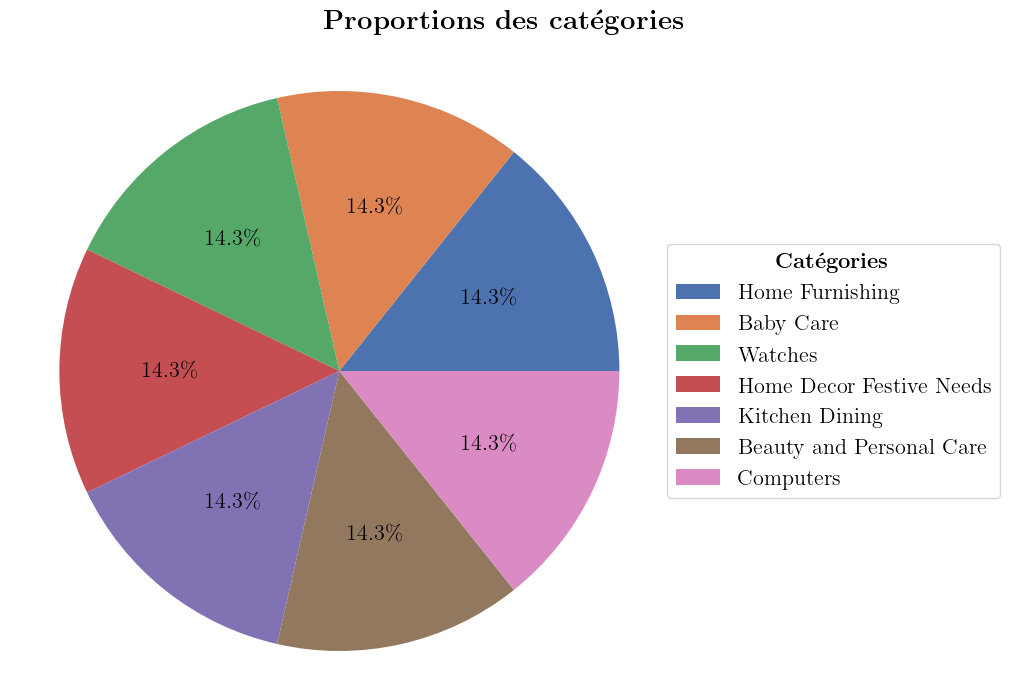

In [15]:
#On affiche les proportions des catégories pour s'assurer que leur distribution est correcte

plt.figure(figsize = (8.5,8))

palette = sns.color_palette('deep')
proportions = data['main_category'].value_counts(normalize = True).sort_values(ascending = False)

wedges, texts, autotexts = plt.pie(proportions, labels = None, autopct='%1.1f%%', colors = palette)

plt.legend(wedges, proportions.index, title = '\\textbf{{Catégories}}', loc = 'center', bbox_to_anchor = (1,0,0.5,1))
plt.title('\\textbf{{Proportions des catégories}}',size = 20, pad = 25)
plt.gca().title.set_position([0.75, 1.05])

plt.axis('equal')
plt.savefig(f"./graphics/pieplot_categories.pdf", bbox_inches='tight')
plt.show()

In [16]:
data['main_category'].value_counts()

main_category
Home Furnishing             150
Baby Care                   150
Watches                     150
Home Decor Festive Needs    150
Kitchen Dining              150
Beauty and Personal Care    150
Computers                   150
Name: count, dtype: int64

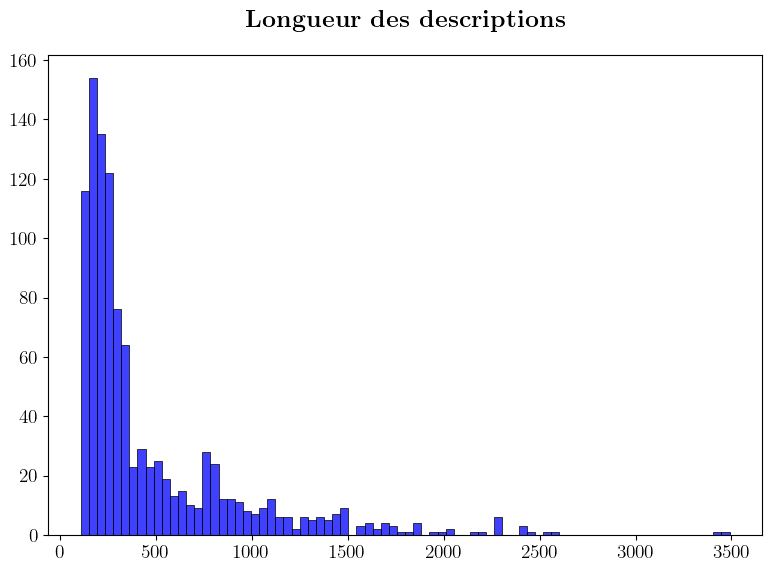

In [17]:
len_desc_list = data.description.str.len()

plt.figure(figsize=(8,6))
sns.histplot(len_desc_list, color = 'blue', bins = 80)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title(f"\\textbf{{Longueur des descriptions}}", size = 18, pad = 20)

plt.tight_layout()
plt.savefig(f"./graphics/hist_desc_length.pdf", bbox_inches='tight')
plt.show()

In [18]:
#On affiche un échantillon

sample = data[['product_name', 'main_category', 'description']].sample(15)
sample

product_name  \
230  Sovam International Krishna With Cow Idol Show...   
600                          R&Mshoppee MDF Wall Shelf   
791        Wild Ferns Manuka Honey Intensive Eye Creme   
369                                       Tenda 3G300M   
123          Craftcart Parrot Antique Brass Key Holder   
329  Asus RT-AC68U Dual-band Wireless-AC1900 Gigabi...   
536  Times 280TMS280 Party-Wedding Analog Watch  - ...   
437                       HomeEdge Solid Wood King Bed   
896              Rustic India Geometric Cushions Cover   
1                           Sathiyas Cotton Bath Towel   
242  Indian Art Villa 2.3" X 6.9" X 2.3" Handmade H...   
542         Maxima 01741LPLN Analog Watch  - For Women   
796                  R.S D&G16 Analog Watch  - For Men   
535           Maxima 24864LMGY Analog Watch  - For Men   
159  Prithish Merry Christmas Design 4 Double Color...   

                main_category  \
230  Home Decor Festive Needs   
600  Home Decor Festive Needs   
791  Beauty and Personal Care   
369                 Computers   
123  Home Decor Festive Needs   
329                 Computers   
536                   Watches   
437  Beauty and Personal Care   
896           Home Furnishing   
1                   Baby Care   
242            Kitchen Dining   
542                   Watches   
796                   Watches   
535                   Watches   
159            Kitchen Dining   

                                           description  
230  Sovam International Krishna With Cow Idol Show...  
600  Key Features of R&Mshoppee MDF Wall Shelf Tren...  
791  Buy Wild Ferns Manuka Honey Intensive Eye Crem...  
369  Buy Tenda 3G300M only for Rs. 3000 from Flipka...  
123  Key Features of Craftcart Parrot Antique Brass...  
329  Buy Asus RT-AC68U Dual-band Wireless-AC1900 Gi...  
536  Times 280TMS280 Party-Wedding Analog Watch  - ...  
437  Key Features of HomeEdge Solid Wood King Bed K...  
896  Rustic India Geometric Cushions Cover (Pack of...  
1    Specifications of Sathiyas Cotton Bath Towel (...  
242  Buy Indian Art Villa 2.3" X 6.9" X 2.3" Handma...  
542  Maxima 01741LPLN Analog Watch  - For Women - B...  
796  R.S D&G16 Analog Watch  - For Men - Buy R.S D&...  
535  Maxima 24864LMGY Analog Watch  - For Men - Buy...  
159  Prithish Merry Christmas Design 4 Double Color...

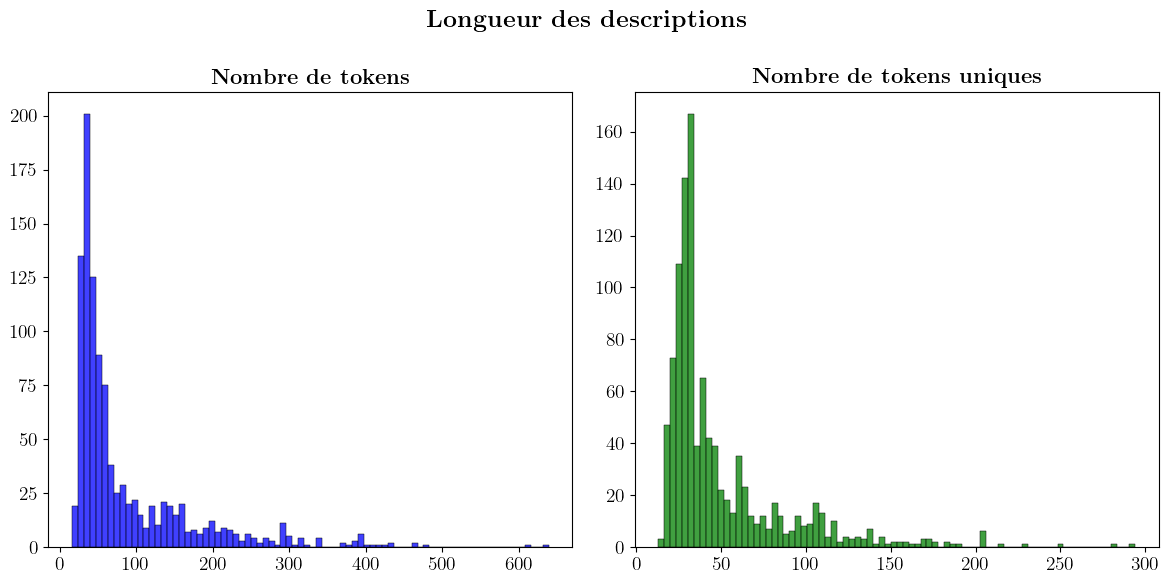

In [19]:
tokens_list = [word_tokenize(doc) for doc in data['description']]

fig, axes = plt.subplots(1,2, figsize = (12,6), gridspec_kw={'width_ratios':[1,1]})
sns.histplot([len(liste) for liste in tokens_list], color = 'blue', bins = 80, ax = axes[0])
sns.histplot([len(set(liste)) for liste in tokens_list], color = 'green', bins = 80, ax = axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[0].set_title('\\textbf{{Nombre de tokens}}', size = 16)
axes[1].set_title('\\textbf{{Nombre de tokens uniques}}', size = 16)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
plt.suptitle(f"\\textbf{{Longueur des descriptions}}", size = 18)

plt.tight_layout()
#plt.savefig(f"./graphics/hist_tokens_general.pdf", bbox_inches='tight')
plt.show()

## 2 - NLP
***

### 2.1 - NETTOYAGE DU CORPUS
***

In [20]:
#Comparaison tokens vs tokens uniques

def tokens_info(tokens):
    print("Nombre de tokens :", len(tokens))
    print("Nombre de tokens uniques :", len(set(tokens)))
    print("Nombre de répétitions :", len(tokens) - len(set(tokens)))

In [21]:
#On crée la liste des stopwords anglais.

stop_words = set(stopwords.words('english'))

In [22]:
#Fonction de nettoyage

def cleaning_text_1(doc):
    
    #on met en minuscule
    doc = doc.lower().strip()
    
    #tokenization
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #on enlève les stopwords
    cleaned_tokens_list = [word for word in raw_tokens_list if word not in stop_words]
    
    #on retourne
    return cleaned_tokens_list

In [103]:
#on regroupe les descriptions

corpus = "".join(data['description'].values)

tokenizer = RegexpTokenizer(r"\w+")
tokenized_corpus = tokenizer.tokenize(corpus)

cleaned_corpus_1 = cleaning_text_1(corpus)

print("Nombre de caractères pour le corpus brut :", len(corpus))
print("Nombre de caractères pour le corpus nettoyé :", len(cleaned_corpus_1))


Nombre de caractères pour le corpus brut : 497512
Nombre de caractères pour le corpus nettoyé : 61452


In [104]:
tokens_info(tokenized_corpus)

Nombre de tokens : 81219
Nombre de tokens uniques : 7873
Nombre de répétitions : 73346


In [24]:
tokens_info(cleaned_corpus_1)

Nombre de tokens : 61452
Nombre de tokens uniques : 6165
Nombre de répétitions : 55287


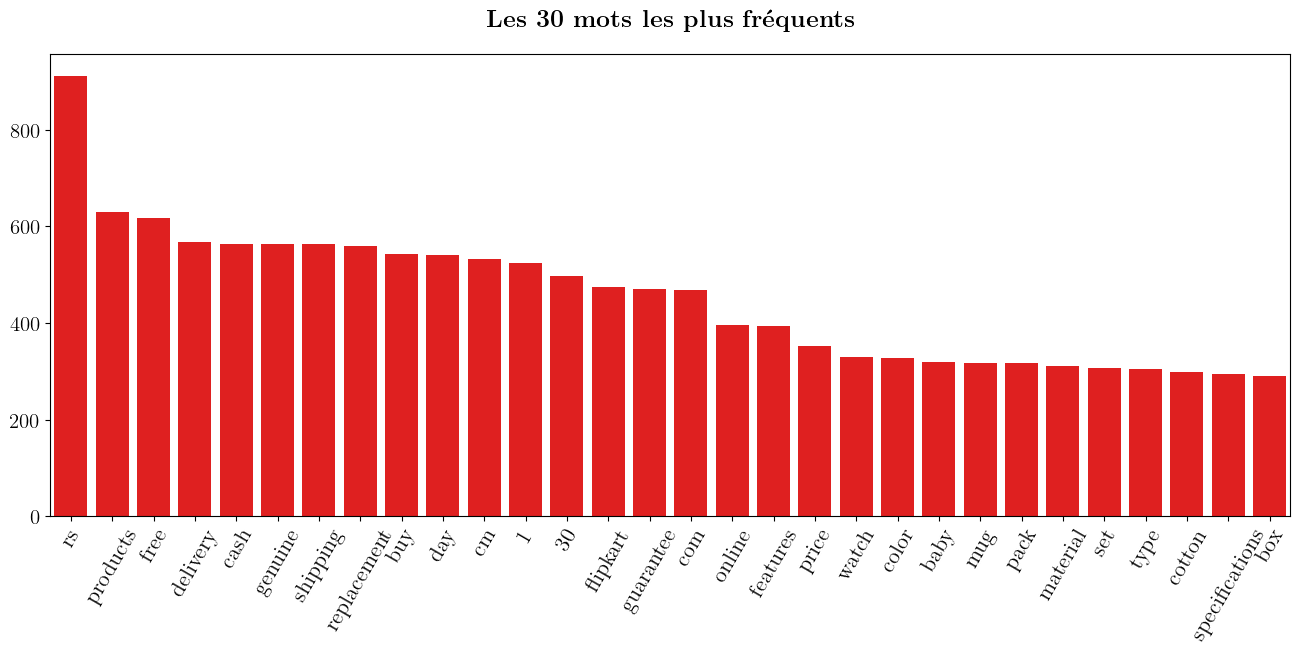

In [25]:
#On peut afficher les tokens les plus présents

tokens_sorted = pd.Series(cleaned_corpus_1).value_counts()

plt.figure(figsize = (16,6))
sns.barplot(x = tokens_sorted.head(30).index, y = tokens_sorted.head(30).values, color = 'red')
plt.title(f"\\textbf{{Les 30 mots les plus fréquents}}", size = 18, pad = 20)
plt.xticks(rotation = 60, size = 16)
plt.yticks(size = 15)
plt.xlabel('')

#plt.savefig(f"./graphics/barplot_words_frequency_general_1.pdf", bbox_inches='tight')
plt.show()

In [26]:
tokens_sorted.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
Name: count, dtype: float64

In [27]:
#On regroupe les éléments n'apparaissant qu'une seule fois dans une liste.

list_unique_words = list(tokens_sorted[tokens_sorted == 1].index)
list_min_5_words = list(tokens_sorted[tokens_sorted < 5].index)

In [28]:
#On enregistre ces listes dans un dataframe

df_unique_words = pd.DataFrame({"words" : list_unique_words})
df_min_5_words = pd.DataFrame({"words" : list_min_5_words})


#df_unique_words.to_csv("data/cleaned/unique_words.csv", index = False)
#df_min_5_words.to_csv("data/cleaned/min_5_words.csv", index = False)

In [29]:
#Nous allons ensuite supprimer les mots qui ne sont pas anglais.

english_words = [word.lower() for word in words.words()]


#On les stem
ps = PorterStemmer()
english_words_stemmed = [ps.stem(word) for word in english_words]

tokens_info(english_words_stemmed)

Nombre de tokens : 236736
Nombre de tokens uniques : 178311
Nombre de répétitions : 58425


In [30]:
#On crée une nouvelle fonction de nettoyage

def cleaning_text_2(doc, list_rare_words = list_unique_words, min_len_word = 3, stem_or_lem = 'lem', alpha = True, english_words = True):
    
    if not list_rare_words:
        list_rare_words = []
    
    #on nettoie
    cleaned_tokens_list = cleaning_text_1(doc)
    
    #on enlève les tokens trop rares
    non_rare_tokens = [word for word in cleaned_tokens_list if word not in list_rare_words]
    
    #on supprime les tokens trop courts
    long_enough_tokens = [word for word in non_rare_tokens if len(word) >= min_len_word]
    
    #tokens alphabétiques
    if alpha:
        alpha_tokens = [word for word in long_enough_tokens if word.isalpha()]
    else:
        alpha_tokens = long_enough_tokens
    
    
    #lemmatization
    if stem_or_lem == 'lem':
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(token) for token in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(token) for token in alpha_tokens]
    

    #mots anglais
    if english_words:
        english_text = [word for word in trans_text if word in english_words_stemmed]
    else:
        english_text = trans_text
        
        
    #on retourne
    return english_text

In [31]:
#on applique et on affiche les infos

cleaned_corpus = cleaning_text_2(corpus)

tokens_info(cleaned_corpus)

Nombre de tokens : 31524
Nombre de tokens uniques : 1483
Nombre de répétitions : 30041


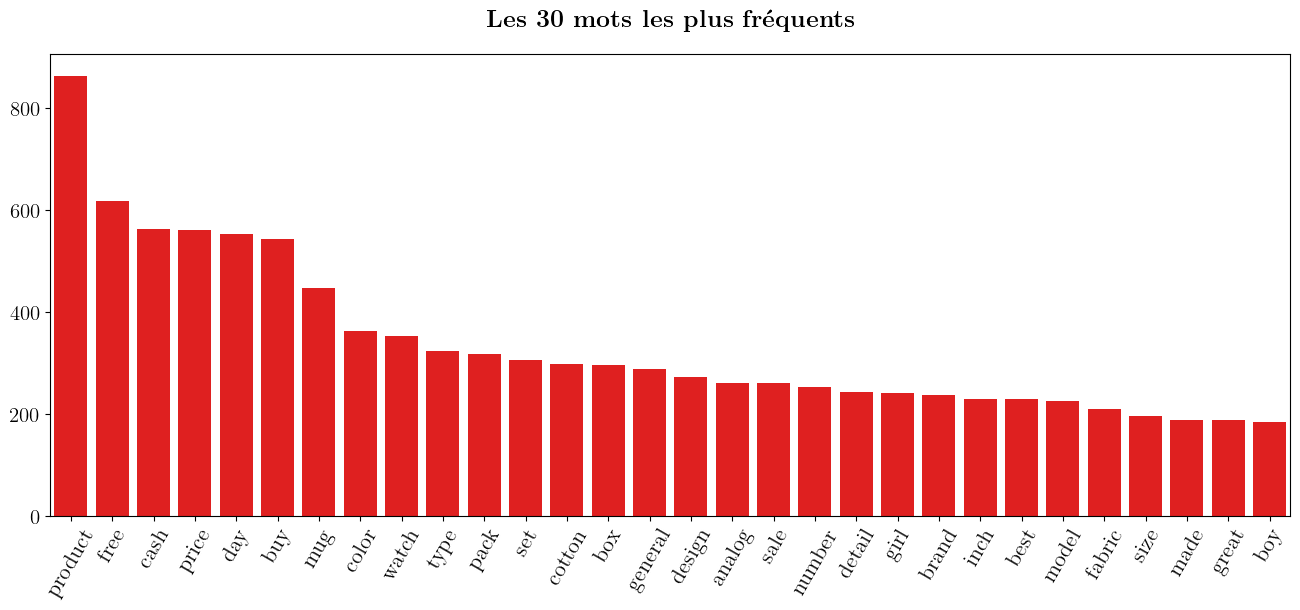

In [32]:
#On affiche

cleaned_tokens_sorted = pd.Series(cleaned_corpus).value_counts()

plt.figure(figsize = (16,6))
sns.barplot(x = cleaned_tokens_sorted.head(30).index, y = cleaned_tokens_sorted.head(30).values, color = 'red')
plt.title(f"\\textbf{{Les 30 mots les plus fréquents}}", size = 18, pad = 20)
plt.xticks(rotation = 60, size = 16)
plt.yticks(size = 15)
plt.xlabel('')

#plt.savefig(f"./graphics/barplot_words_frequency_general_2.pdf", bbox_inches='tight')
plt.show()

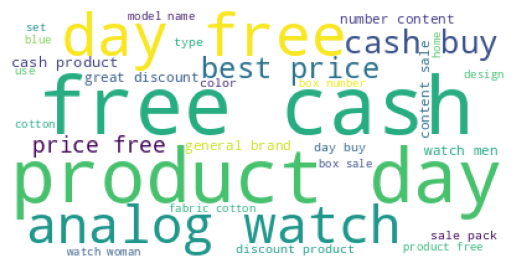

In [33]:
wordcloud = WordCloud(background_color = "white",
                      stopwords=[],
                      max_words = 30).generate(" ".join(cleaned_corpus))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig(f"./graphics/wc_words_frequency_general.pdf", bbox_inches='tight')
plt.show()

In [34]:
#Séparation des catégories

df_names = []

for category in data['main_category'].unique():
    name = category.lower().strip().replace(' ', '')
    df_name = data.loc[data['main_category'] == category, ['main_category', 'description']]
    globals()[f"df_{name}"] = df_name
    df_names.append(f"{category}")

dict_df_names = dict(zip(list(range(len(df_names))), df_names))

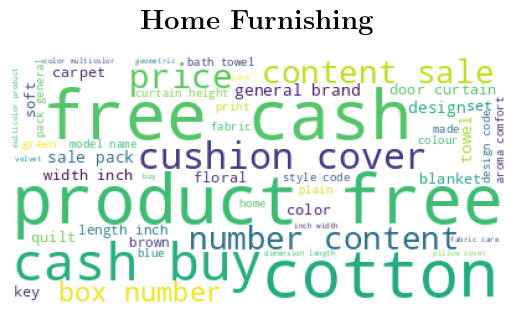

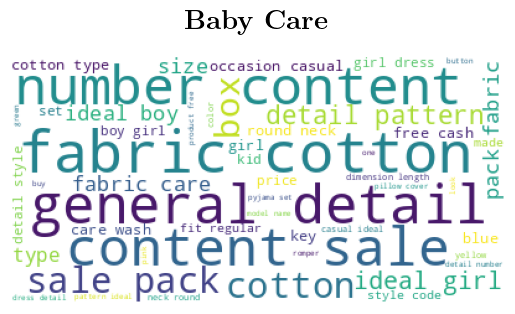

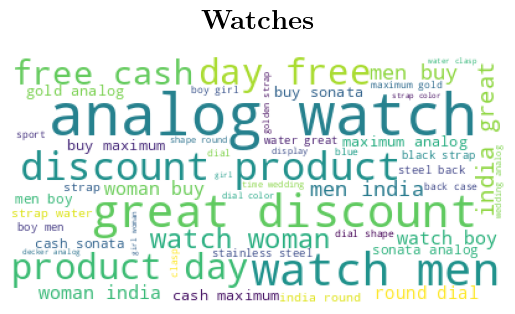

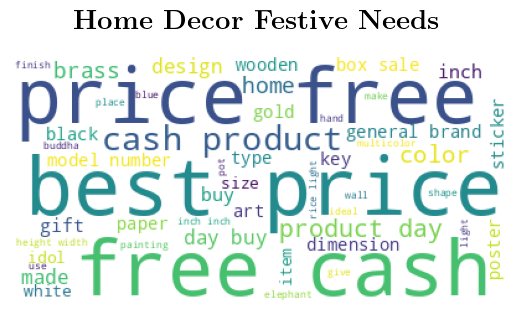

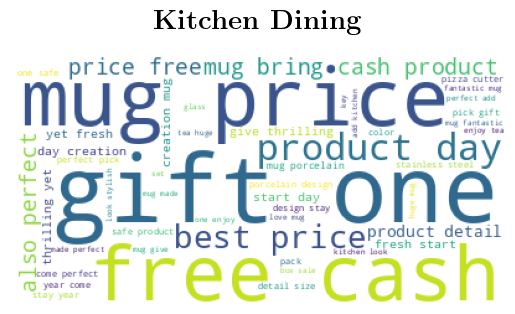

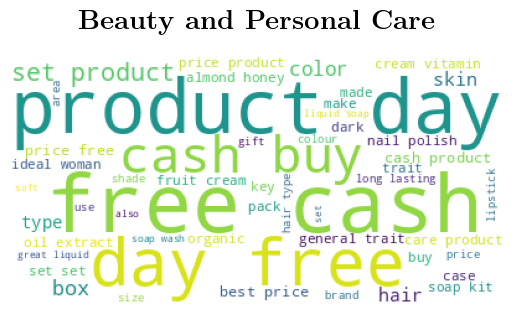

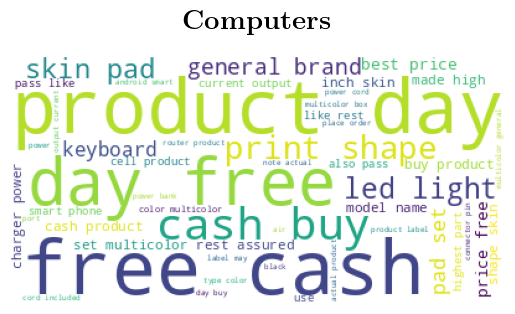

In [35]:
#On crée un corpus par catégorie en regroupant les descriptions.

for i in range(len(df_names)):
    category = dict_df_names[i]
    name = dict_df_names[i].lower().strip().replace(' ', '')
    df_name = globals()[f"df_{name}"]
    corpus_i = " ".join(df_name['description'])
    
    #On clean
    processed_corpus_i = cleaning_text_2(corpus_i)
    
    #On les passe en globales
    globals()[f"corpus_{i}"] = corpus_i
    globals()[f"processed_corpus_{i}"] = processed_corpus_i
    
    #On visualise
    wordcloud = WordCloud(background_color = 'white', stopwords = [], max_words = 50).generate(" ".join(processed_corpus_i))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f"\\textbf{{{category}}}", size = 20, pad = 20)
    #plt.savefig(f"./graphics/wc_words_frequency_{name}.pdf", bbox_inches='tight')
    plt.show()

In [36]:
#détection des doublons

def doublons_tokens(n):
    
    #On crée une liste vide dans laquelle nous allons ajouter les tokens uniques pour chaque catégorie
    list_tokens = []
    
    for i in range(len(df_names)):
        processed_corpus = globals()[f"processed_corpus_{i}"]
        list_tokens_category = pd.Series(processed_corpus).value_counts().head(n).index.tolist()
        list_tokens = list_tokens + list_tokens_category
    #print(list_tokens)
    df_tokens = pd.DataFrame({'mots' : list_tokens}).value_counts().reset_index()
    df_tokens_count = pd.DataFrame({"mots" : df_tokens['mots'], "n" : df_tokens['count']})
    df_tokens_doublons = df_tokens_count.loc[df_tokens_count["n"] > 1, :]
    
    liste_doublons = df_tokens_doublons['mots'].tolist()
    
    return(liste_doublons)

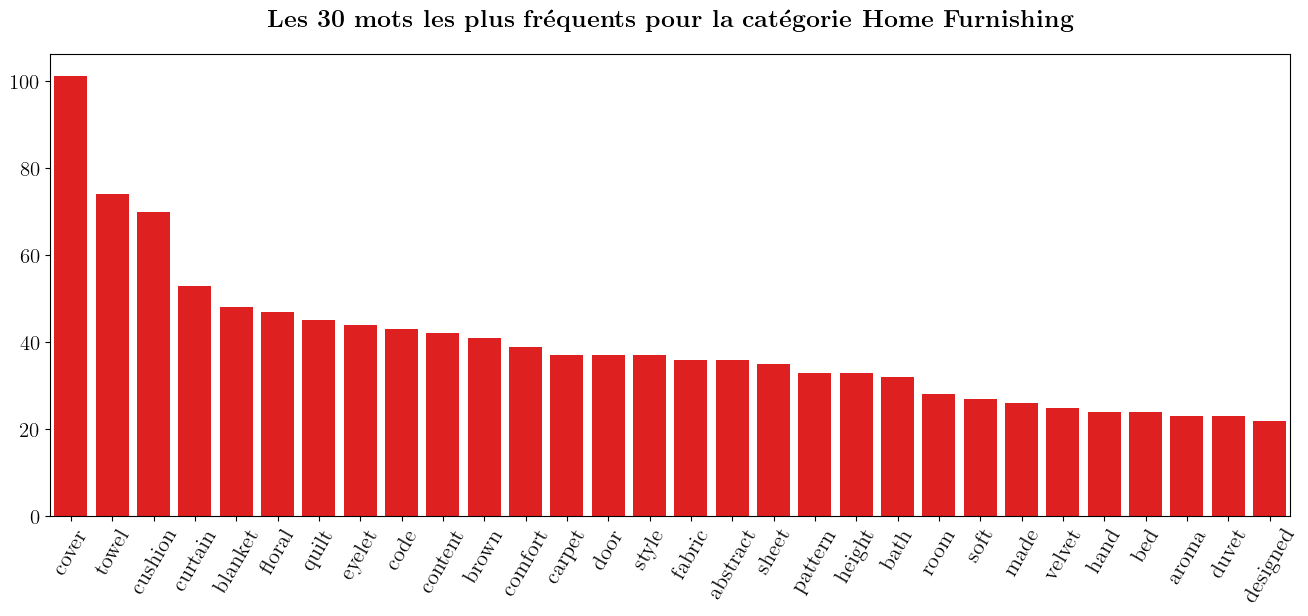

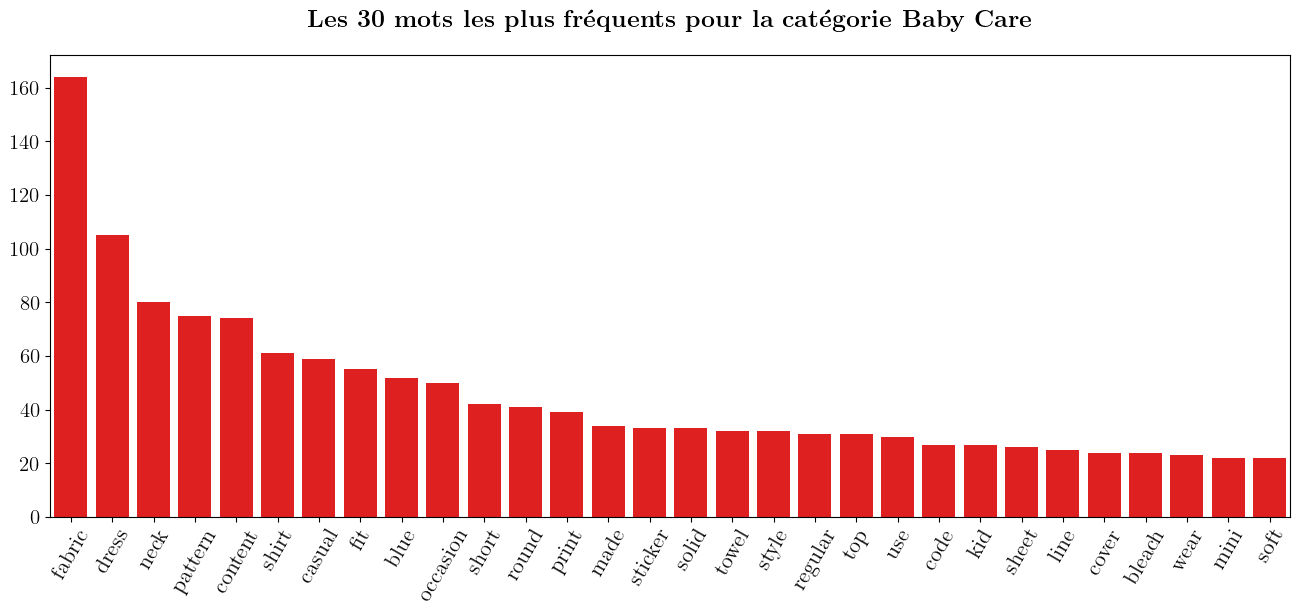

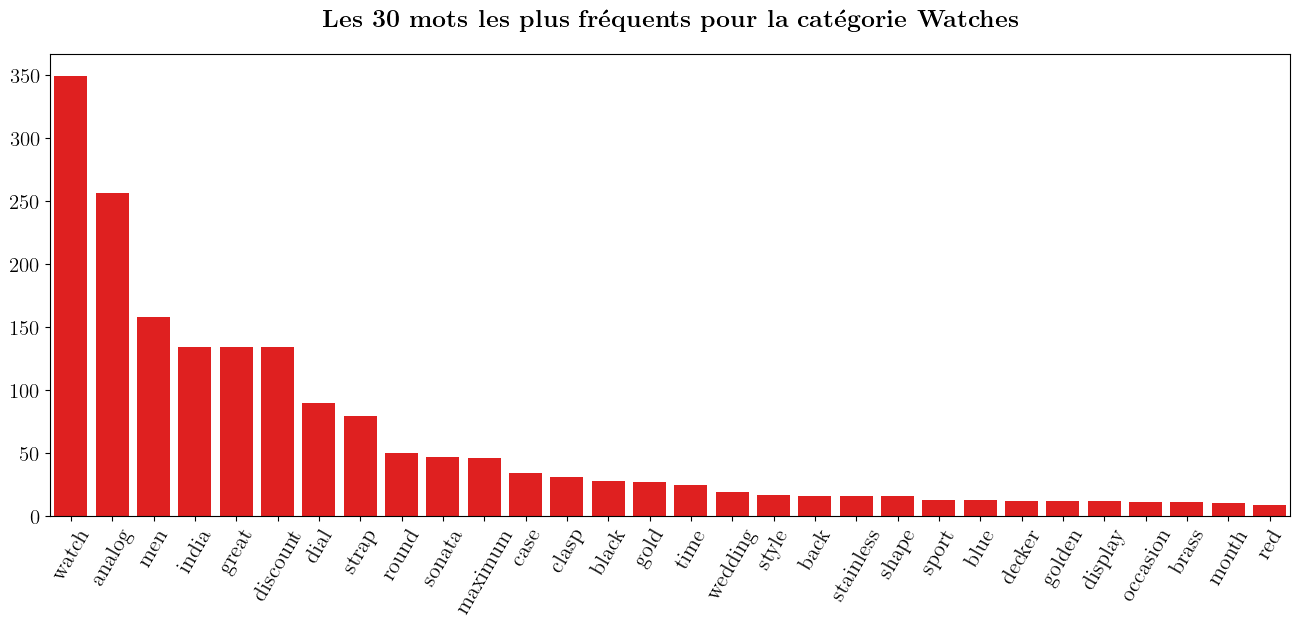

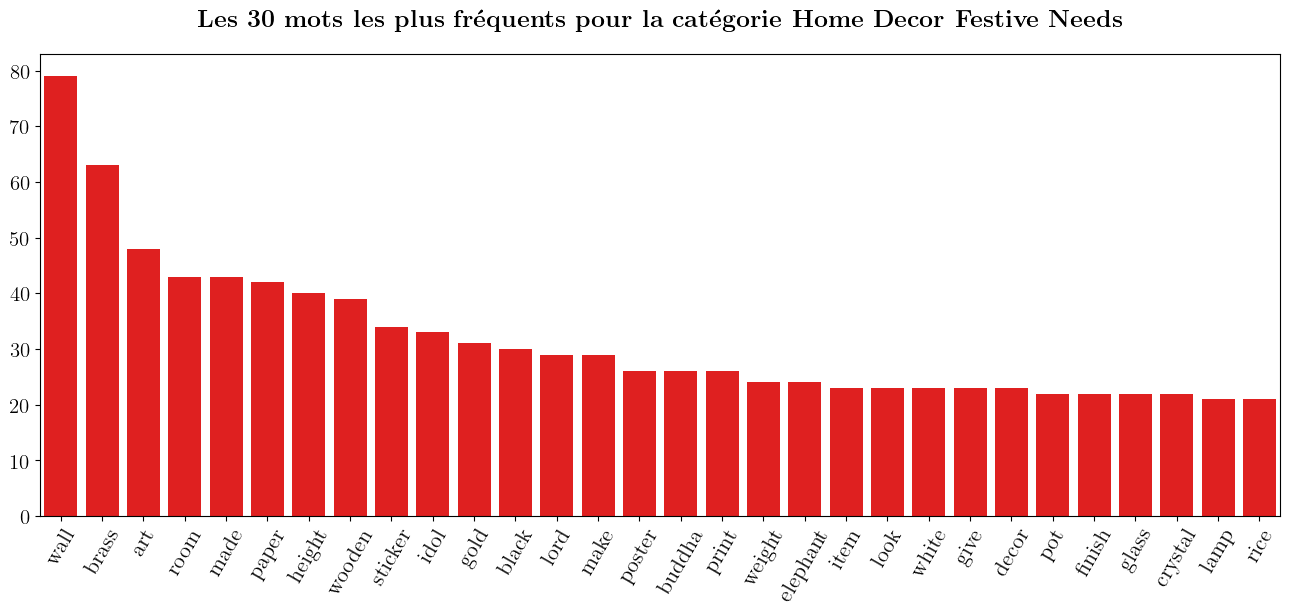

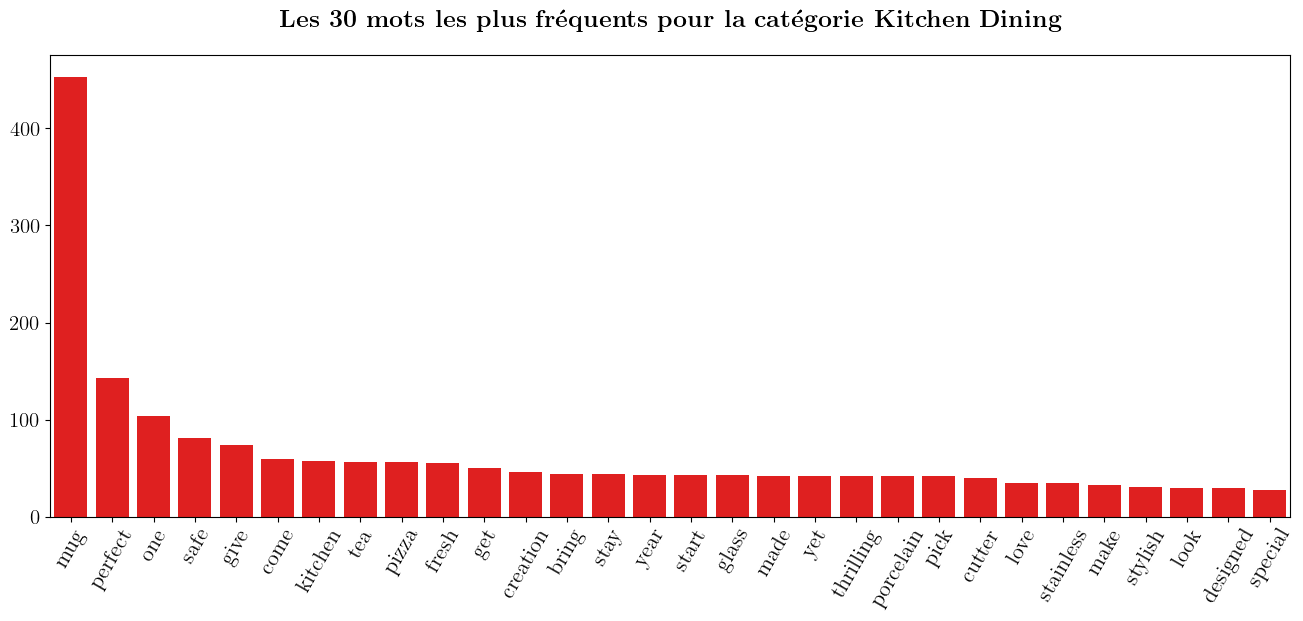

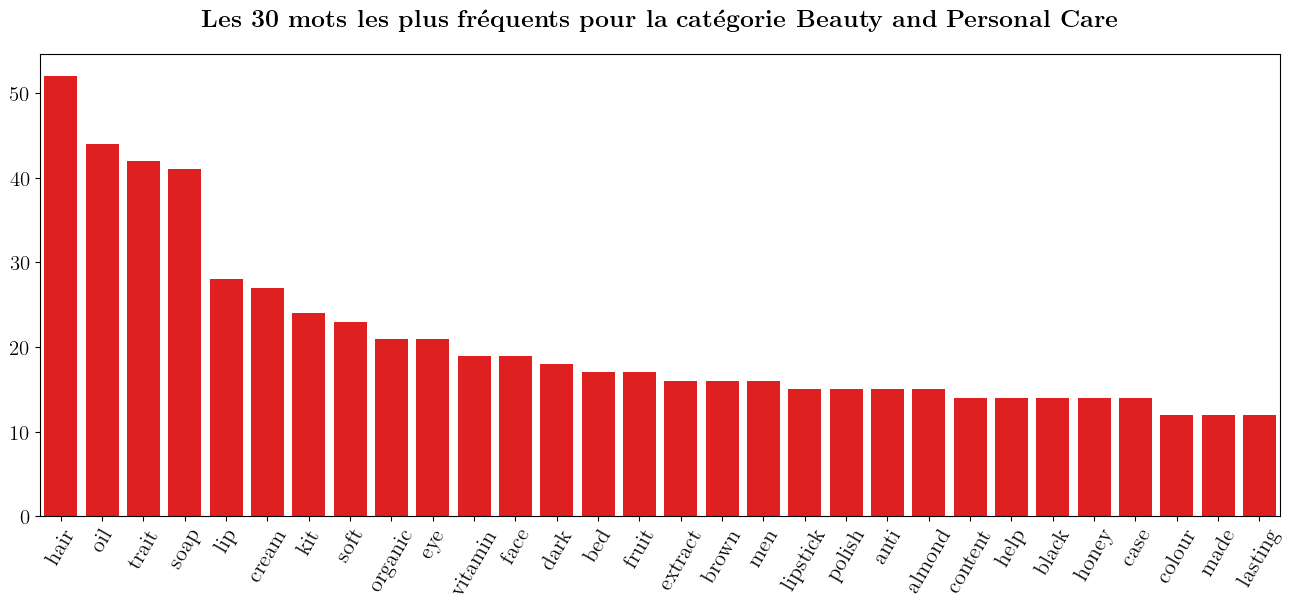

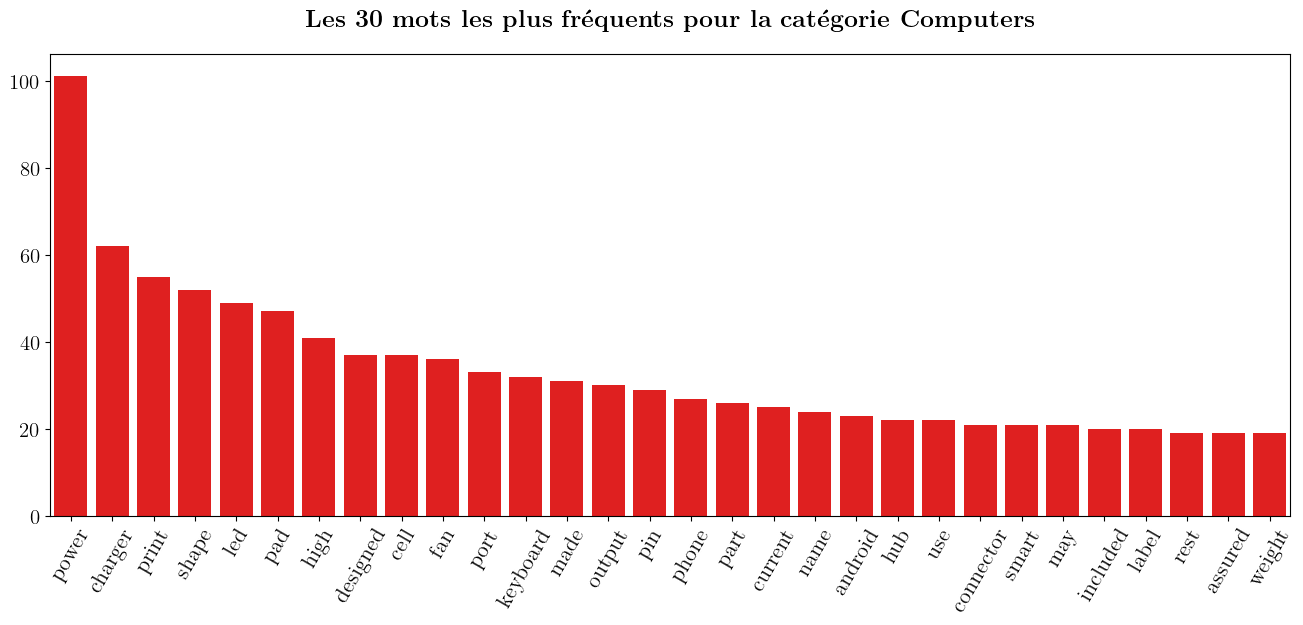

In [37]:
liste_doublons = doublons_tokens(30)

for i in range(len(df_names)):
    category = dict_df_names[i]
    processed_corpus_i = globals()[f"processed_corpus_{i}"]
    cleaned_corpus_i = [word for word in processed_corpus_i if word not in liste_doublons]
    tokens_list_i = pd.Series(cleaned_corpus_i).value_counts()
    plt.figure(figsize = (16,6))
    sns.barplot(x = tokens_list_i.head(30).index, y = tokens_list_i.head(30).values, color = 'red')
    plt.title(f"\\textbf{{Les 30 mots les plus fréquents pour la catégorie {category}}}", size = 18, pad = 20)
    plt.xticks(rotation = 60, size = 16)
    plt.yticks(size = 15)
    plt.xlabel('')
    #plt.savefig(f"./graphics/barplot_words_frequency_{category.lower().replace(' ', '')}.pdf", bbox_inches='tight')
    plt.show()

### 2.2 - SEGMENTATION (BoW & TF-IDF)
***

#### 2.2.1 - Nettoyage des descriptions et préparation des données
***

In [38]:
#On va maintenant nettoyer chaque description

def final_cleaning(doc):
    cleaned_doc = cleaning_text_2(doc)
    final_doc = [word for word in cleaned_doc if word not in liste_doublons]
    
    return(final_doc)

In [39]:
#On instancie la partie du data qui nous intéresse

data_texte = data[['uniq_id', 'product_name', 'main_category', 'description']].copy()

data_texte.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name    main_category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing   
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

In [40]:
#On nettoie cleaned_description descriptions

data_texte['tokenized_description'] = data_texte['description'].apply(final_cleaning)
data_texte['cleaned_description'] = data_texte['tokenized_description'].apply(lambda x: ' '.join(x))

In [41]:
#On affiche l'entête

data_texte.drop(columns=['description'], inplace = True)

data_texte.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name    main_category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing   
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing   

                               tokenized_description  \
0  [abstract, eyelet, door, curtain, floral, curt...   
1  [bath, towel, bath, towel, red, yellow, blue, ...   
2  [face, towel, small, height, face, towel, face...   
3  [royal, fashion, king, royal, wedding, royal, ...   
4  [print, floral, king, print, floral, king, bed...   

                                 cleaned_description  
0  abstract eyelet door curtain floral curtain ab...  
1  bath towel bath towel red yellow blue bath tow...  
2  face towel small height face towel face towel ...  
3  royal fashion king royal wedding royal fashion...  
4  print floral king print floral king bed sheet ...

In [42]:
#On ajoute le nombre de tokens et de caractères pour chaque description

data_texte['nb_tokens'] = data_texte['tokenized_description'].apply(len)
data_texte['nb_char'] = data_texte['cleaned_description'].apply(len)

In [43]:
#On supprime les éléments ayant une description vide

data_texte = data_texte.loc[data_texte['nb_tokens'] != 0,:]

In [5]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report, recall_score, accuracy_score, f1_score, precision_score, adjusted_rand_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [45]:
#Un transformeur pour transformer les matrices creuses en array
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

#### 2.2.2 - Bag of Words & TF-IDF
***

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment

In [46]:
#les vectorizers
bow_vectorizer = CountVectorizer(max_features = 1000, stop_words = 'english')
tfidf_vectorizer = TfidfVectorizer(max_features = 1000, stop_words = 'english')

#les pipelines
pipeline_std_tsne = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components = 2, init='random', random_state = 42))
])

pipeline_std_pca_tsne = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 0.99)),
    ('tsne', TSNE(n_components = 2, init='random', random_state = 42))
])

pipeline_pca_tsne = Pipeline([
    ('pca', PCA(n_components = 0.99)),
    ('tsne', TSNE(n_components = 2,  init='random', random_state = 42))
])

pipeline_tsne = Pipeline([
    ('tsne', TSNE(n_components = 2, init='random', random_state = 42))
])

In [47]:
#Création d'un dictionnaire pour appeler les pipelines dans une boucle for

liste_pipelines = [pipeline_tsne, pipeline_pca_tsne, pipeline_std_tsne, pipeline_std_pca_tsne]
liste_noms_pipelines = ['tsne', 'pca_tsne', 'std_tsne', 'std_pca_tsne']

pipeline_dic = dict(zip(liste_noms_pipelines, liste_pipelines))

In [121]:
#On cree les dataframes vides dans lesquels on stockera nos résultats

df_labels = pd.DataFrame()
df_labels['true_labels'] = data_texte['main_category']
df_scores = pd.DataFrame()

In [122]:
#on encode nos catégories

label_encoder = LabelEncoder()

df_labels['true_encoded_labels'] = label_encoder.fit_transform(df_labels['true_labels'])

In [50]:
#pour les graphiques futurs, création d'une palette de couleurs

palette_deep = sns.color_palette("deep", 7)
palette_deep_mapping = {i: color for i, color in enumerate(palette_deep)}

In [147]:
#on effectue nos calculs dans une boucle for

liste_bool_pca = []
liste_bool_std = []
liste_scores = []

for name, pipeline in pipeline_dic.items():
    
    df_name = pd.DataFrame()
    
    #on définit les pipelines
    bow_pipeline = Pipeline([
        ('bow', bow_vectorizer),
        ('to_array', DenseTransformer()),
        (name, pipeline)
    ])
    
    tfidf_pipeline = Pipeline([
        ('tf_idf', tfidf_vectorizer),
        ('to_array', DenseTransformer()),
        (name, pipeline)
    ])
    
    #les booléens
    is_acp = 'pca' in name
    is_std = 'std' in name
    
    if is_acp:
        liste_bool_pca += ['OUI', 'OUI']
    else:
        liste_bool_pca += ['NON', 'NON']
        
        
    if is_std:
        liste_bool_std += ['OUI', 'OUI']
    else:
        liste_bool_std += ['NON', 'NON']
    
    #application des pipelines
    X_bow = bow_pipeline.fit_transform(data_texte['cleaned_description'])
    X_tfidf = tfidf_pipeline.fit_transform(data_texte['cleaned_description'])
    
    df_name['bow_tsne_1'] = X_bow[:,0]
    df_name['bow_tsne_2'] = X_bow[:,1]
    df_name['tfidf_tsne_1'] = X_tfidf[:,0]
    df_name['tfidf_tsne_2'] = X_tfidf[:,1]
    globals()[f"df_{name}"] = df_name
    
    #Kmeans clustering
    kmeans = KMeans(n_clusters=len(df_names), n_init = 'auto', init = 'k-means++', random_state = 42)
    labels_bow = kmeans.fit_predict(X_bow)
    labels_tfidf = kmeans.fit_predict(X_tfidf)

    #On corrige les labels pour les faire correspondre
    conf_mat_bow = confusion_matrix(df_labels['true_encoded_labels'], labels_bow)
    conf_mat_tfidf = confusion_matrix(df_labels['true_encoded_labels'], labels_tfidf)

    row_bow, col_bow = linear_sum_assignment(-conf_mat_bow)
    row_tfidf, col_tfidf = linear_sum_assignment(-conf_mat_tfidf)

    labels_bow_reassigned = [col_bow[i] for i in labels_bow]
    labels_tfidf_reassigned = [col_tfidf[i] for i in labels_tfidf]
    
    #adjusted rand score
    ari_bow = adjusted_rand_score(df_labels['true_labels'], labels_bow)
    ari_tfidf = adjusted_rand_score(df_labels['true_labels'], labels_tfidf)
    
    liste_scores.append(ari_bow)
    liste_scores.append(ari_tfidf)
    
    #Les dataframes
    df_labels['bow' + '_' + name] = labels_bow
    df_labels['bow' + '_' + name + '_' + 'reassigned'] = labels_bow_reassigned
    df_labels['tfidf' + '_' + name] = labels_tfidf
    df_labels['tfidf' + '_' + name + '_' + 'reassigned'] = labels_tfidf_reassigned
    
df_scores['METHODE'] = ['Bow', 'TF-IDF', 'Bow', 'TF-IDF', 'Bow', 'TF-IDF', 'Bow', 'TF-IDF']
df_scores['STD'] = liste_bool_std
df_scores['PCA'] = liste_bool_pca
df_scores['ARI SCORE'] = liste_scores

In [150]:
#on cree un dataframe pour ne garder que les labels réassingés

data_bow_labels = pd.DataFrame()
data_bow_labels['True labels'] = df_labels['true_encoded_labels']
data_bow_labels['T-SNE'] = df_labels['bow_tsne_reassigned']
data_bow_labels['PCA + T-SNE'] = df_labels['bow_pca_tsne_reassigned']
data_bow_labels['STD + T-SNE'] = df_labels['bow_std_tsne_reassigned']
data_bow_labels['STD + PCA + T-SNE'] = df_labels['bow_std_pca_tsne_reassigned']

data_tfidf_labels = pd.DataFrame()
data_tfidf_labels['True labels'] = df_labels['true_encoded_labels']
data_tfidf_labels['T-SNE'] = df_labels['tfidf_tsne_reassigned']
data_tfidf_labels['PCA + T-SNE'] = df_labels['tfidf_pca_tsne_reassigned']
data_tfidf_labels['STD + T-SNE'] = df_labels['tfidf_std_tsne_reassigned']
data_tfidf_labels['STD + PCA + T-SNE'] = df_labels['tfidf_std_pca_tsne_reassigned']

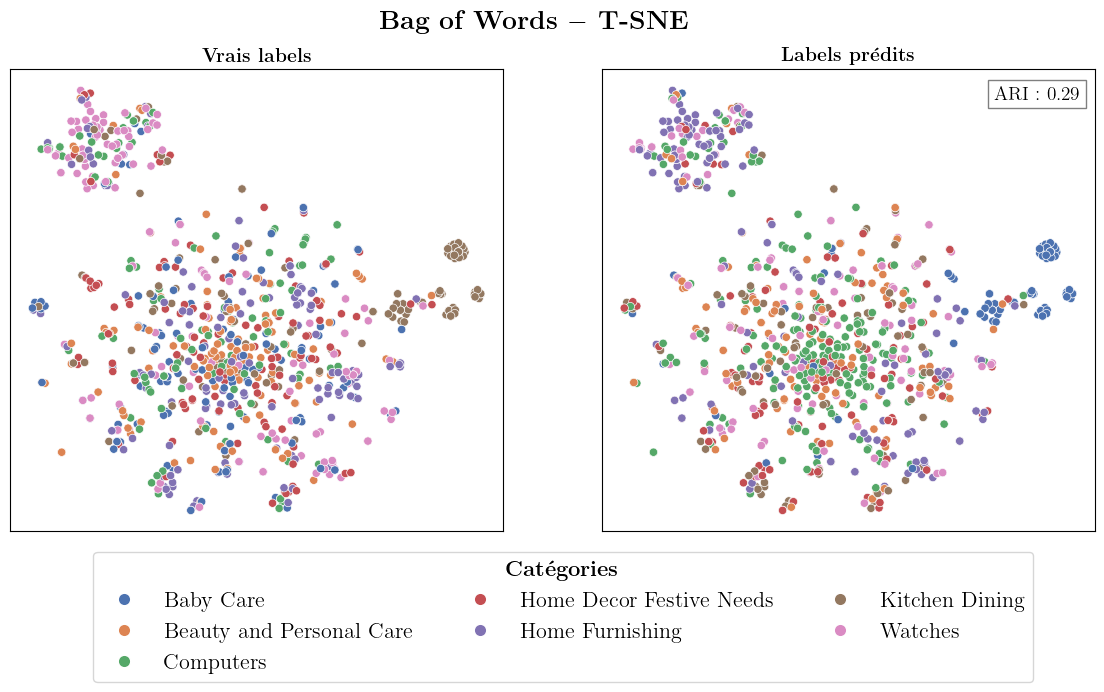

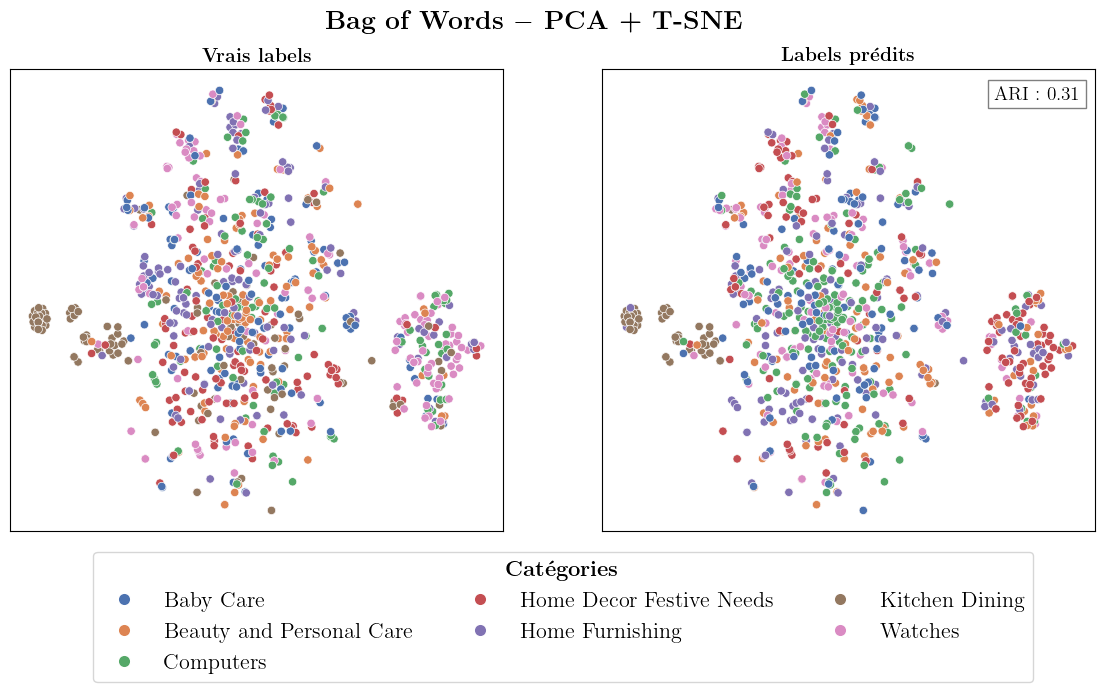

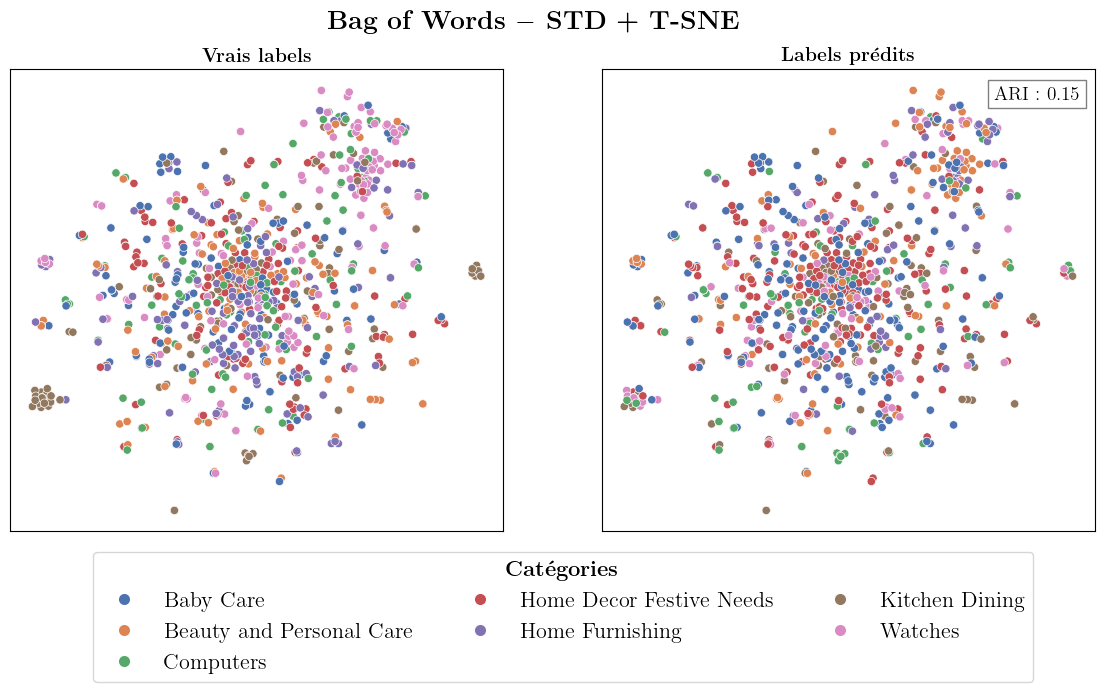

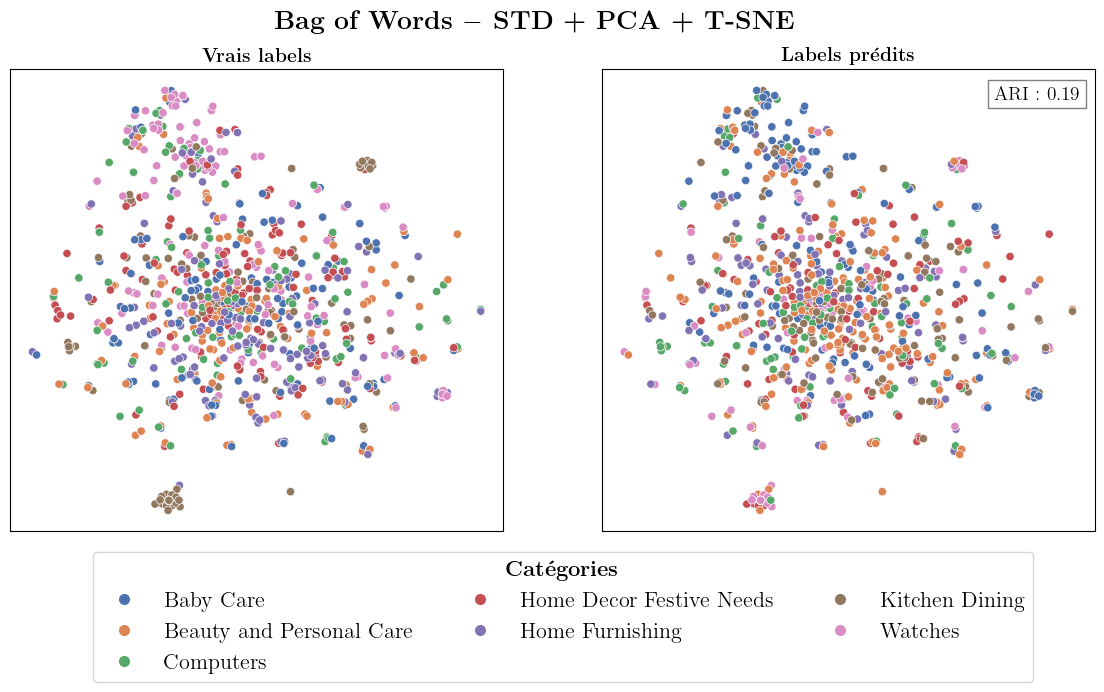

In [186]:
#On plot
for i, col in zip(range(0,7,2), data_bow_labels.columns[1:]):
    name = col.lower().replace(' ','').replace('-','').replace('+','_')
    df_name = globals()[f"df_{name}"]
    
    fig, axes = plt.subplots(1,2, figsize = (14,6), gridspec_kw={'width_ratios':[1,1]})
    sns.scatterplot(x = df_name['bow_tsne_1'], y = df_name['bow_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_bow_labels['True labels'], ax = axes[0])
    sns.scatterplot(x = df_name['bow_tsne_1'], y = df_name['bow_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_bow_labels[col], ax = axes[1])
    axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
    axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    axes[1].text(0.97, 0.965, f"ARI : {round(df_scores.iloc[i, 3], 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

    #légende
    category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
    plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
    plt.suptitle(f"\\textbf{{Bag of Words $-$ {col}}}")
    #plt.savefig(f"./graphics/scatter_bow_{name}.pdf", bbox_inches='tight')
    plt.show()

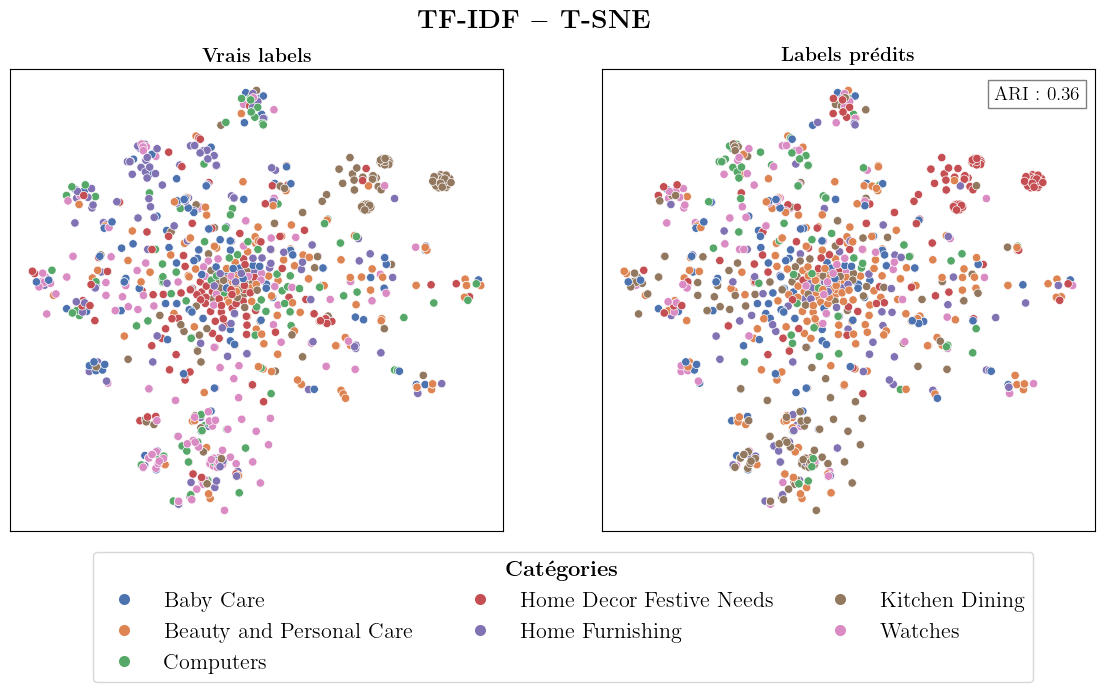

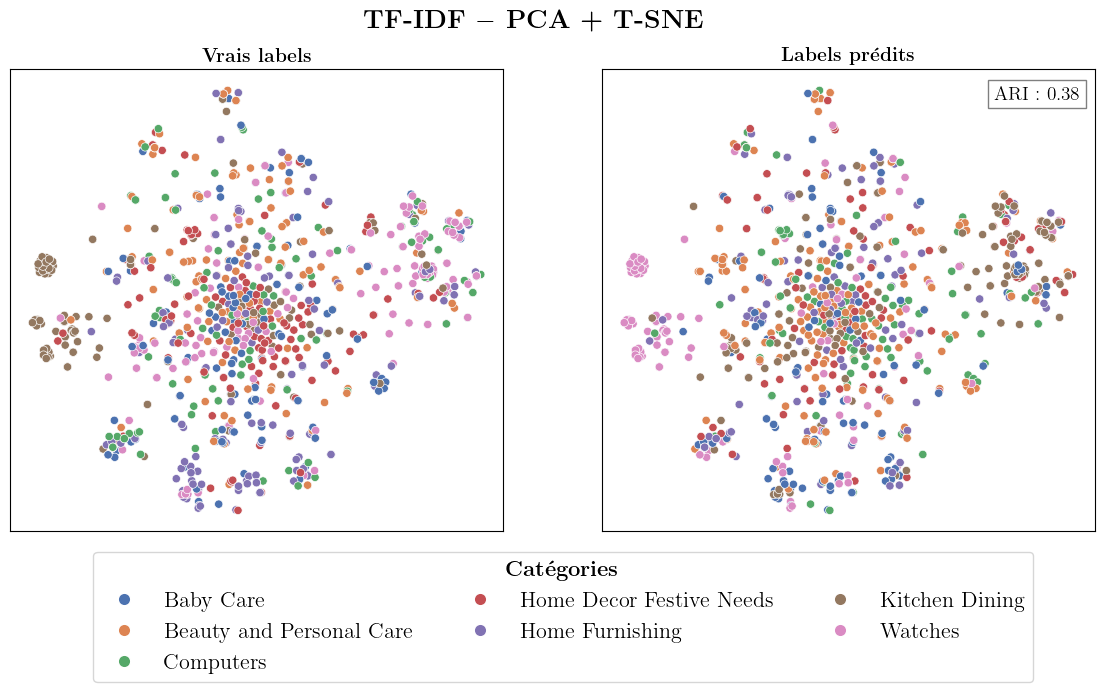

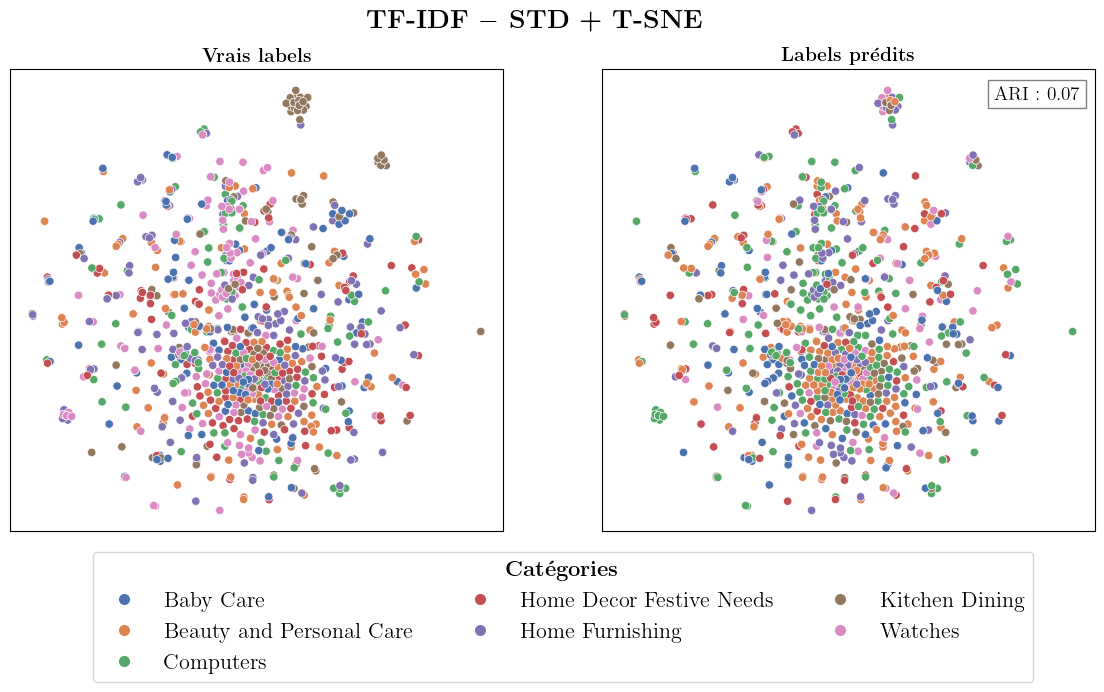

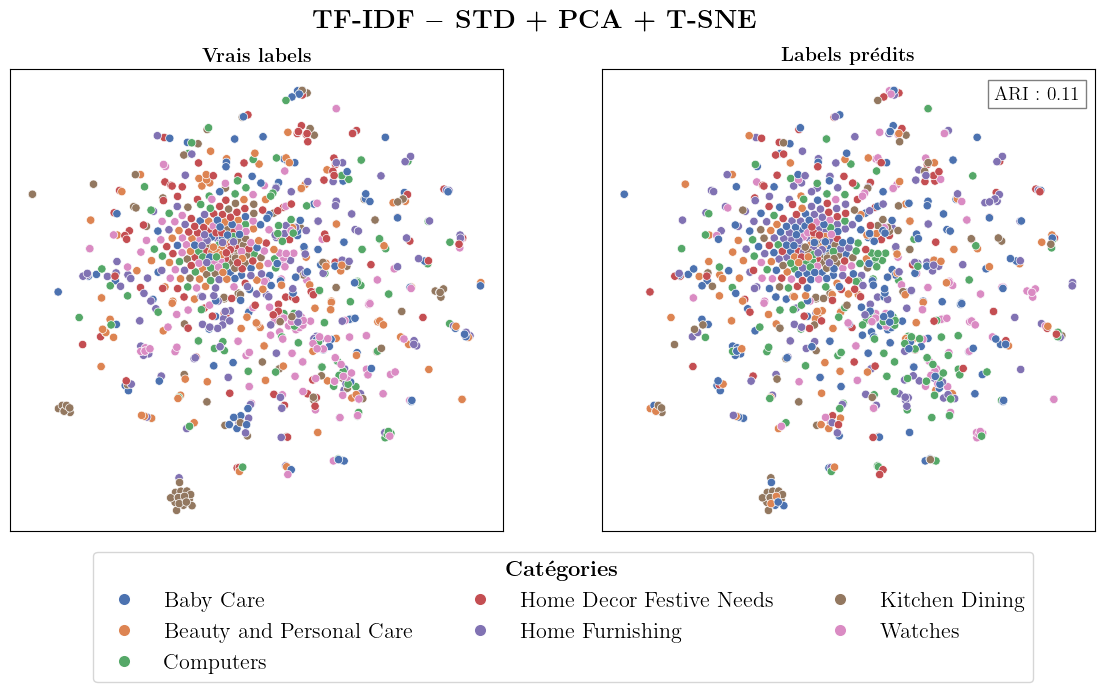

In [199]:
#On plot
for i, col in zip(range(1,8,2), data_tfidf_labels.columns[1:]):
    name = col.lower().replace(' ','').replace('-','').replace('+','_')
    df_name = globals()[f"df_{name}"]
    
    fig, axes = plt.subplots(1,2, figsize = (14,6), gridspec_kw={'width_ratios':[1,1]})
    sns.scatterplot(x = df_name['tfidf_tsne_1'], y = df_name['tfidf_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_tfidf_labels['True labels'], ax = axes[0])
    sns.scatterplot(x = df_name['tfidf_tsne_1'], y = df_name['tfidf_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_tfidf_labels[col], ax = axes[1])
    axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
    axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    axes[1].text(0.97, 0.965, f"ARI : {round(df_scores.iloc[i, 3], 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

    #légende
    category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
    plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
    plt.suptitle(f"\\textbf{{TF-IDF $-$ {col}}}")
    #plt.savefig(f"./graphics/scatter_tfidf_{name}.pdf", bbox_inches='tight')
    plt.show()

### 2.3 - SEGMENTATION (Word2Vec, BERT & Use)
***

In [7]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

#### 2.3.1 - Word2Vec
****

In [190]:
#Nos descriptions

descriptions = [desc for desc in data_texte['tokenized_description']]

In [191]:
#Une fonction pour calculer le vecteur moyen

def mean_vector(desc, model):
    
    n_words = len(desc)
    dim = model.vector_size
    mean_vector = np.zeros(dim, dtype = 'float64')
    vocabulary = model.wv.index_to_key
    
    for word in desc:
        mean_vector += model.wv[word]
    
    mean_vector = mean_vector / n_words
    
    return mean_vector

In [192]:
#On instancie notre modèle Word2Vec
model_word2vec = Word2Vec(descriptions, vector_size = 100, window = 3, min_count = 1, workers = 4)

#On récupère la liste des vecteurs moyens
model_word2vec_features = [mean_vector(desc, model_word2vec) for desc in data_texte['tokenized_description']]

In [196]:
#On effectue les calculs avec les différentes pipelines

for name, pipeline in pipeline_dic.items():
    
    #On récupère les dataframes
    df_name = globals()[f"df_{name}"]

    #les booléens
    is_acp = 'pca' in name
    is_std = 'std' in name
    
    if is_acp:
        pca = 'OUI'
    else:
        pca = 'NON'
        
    if is_std:
        std = 'OUI'
    else:
        std = 'NON'
    
    #applications de la pipeline
    X_word2vec = pipeline.fit_transform(np.array(model_word2vec_features))
    
    df_name['w2c_tsne_1'] = X_word2vec[:,0]
    df_name['w2c_tsne_2'] = X_word2vec[:,1]
    
    globals()[f"df_{name}"] = df_name
    
    #Kmeans
    kmeans = KMeans(n_clusters = len(df_names), n_init = 'auto', init = 'k-means++', random_state = 42)
    labels_w2c = kmeans.fit_predict(X_word2vec)


    #On corrige les labels pour les faire correspondre
    conf_mat_w2c = confusion_matrix(df_labels['true_encoded_labels'], labels_w2c)
    row_w2c, col_w2c = linear_sum_assignment(-conf_mat_w2c)
    labels_w2c_reassigned = [col_w2c[i] for i in labels_w2c]
    
    #ARI Score
    ari_score = adjusted_rand_score(df_labels['true_labels'], labels_w2c)
    
    
    #On ajoute aux dataframes
    df_labels['w2c' + '_' + name] = labels_w2c
    df_labels['w2c' + '_' + name + '_' + 'reassigned'] = labels_w2c_reassigned
    
    df_scores.loc[len(df_scores)] = ['W2C', std, pca, ari_score]

In [197]:
#On rassemble dans un dataframe

data_w2c_labels = pd.DataFrame()
data_w2c_labels['True labels'] = df_labels['true_encoded_labels']
data_w2c_labels['T-SNE'] = df_labels['w2c_tsne_reassigned']
data_w2c_labels['PCA + T-SNE'] = df_labels['w2c_pca_tsne_reassigned']
data_w2c_labels['STD + T-SNE'] = df_labels['w2c_std_tsne_reassigned']
data_w2c_labels['STD + PCA + T-SNE'] = df_labels['w2c_std_pca_tsne_reassigned']

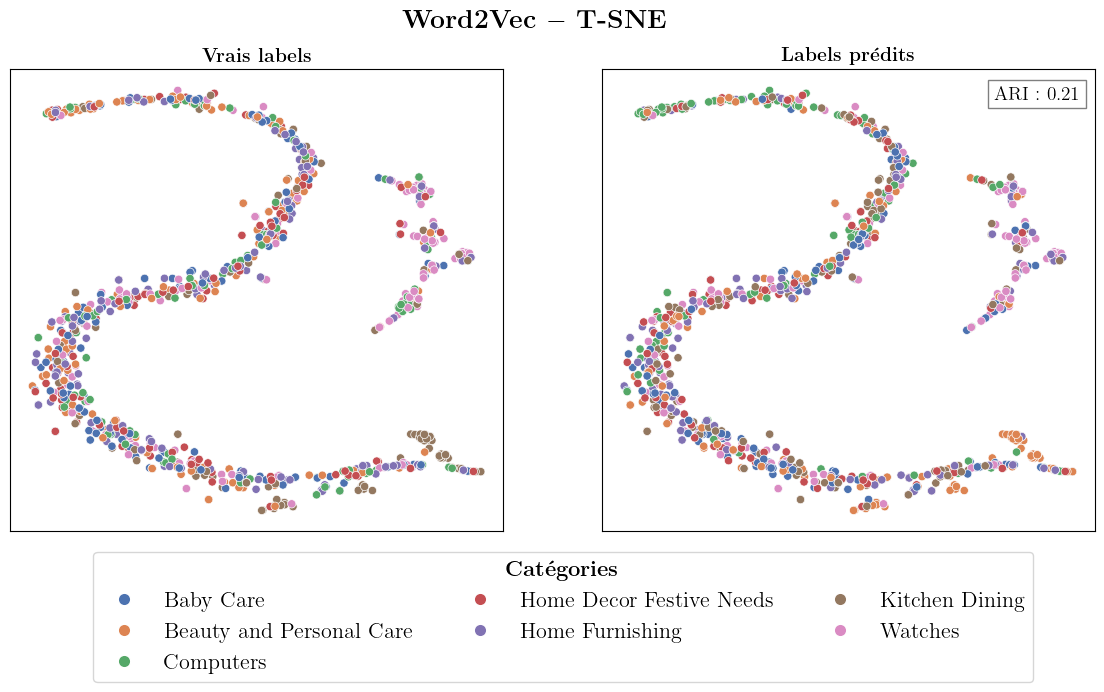

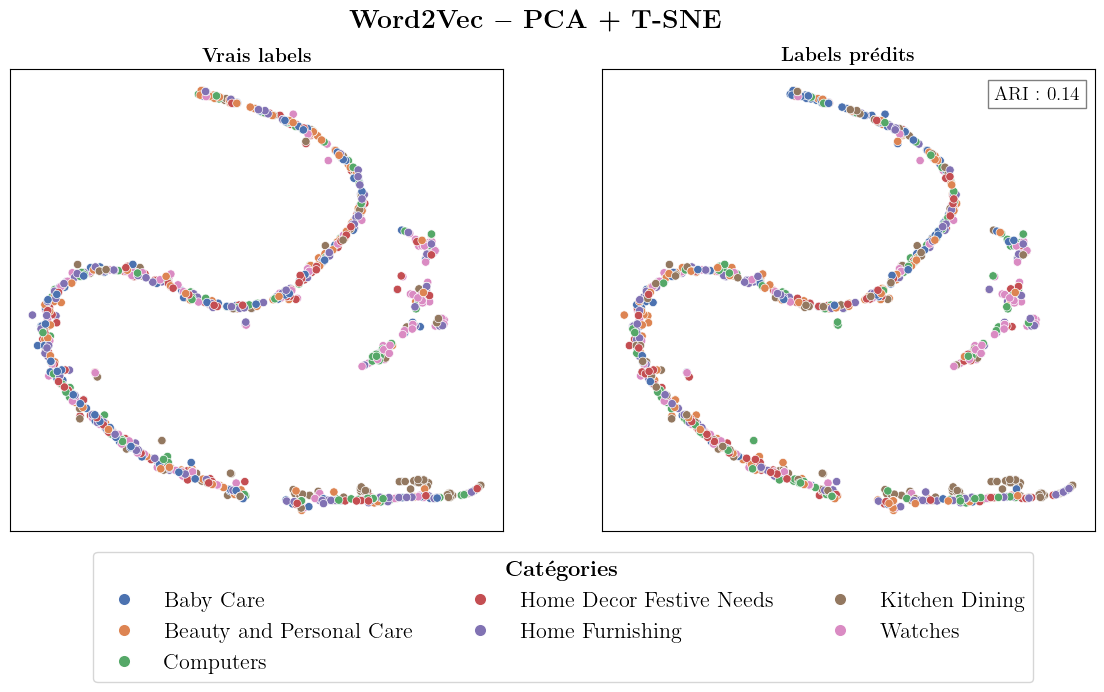

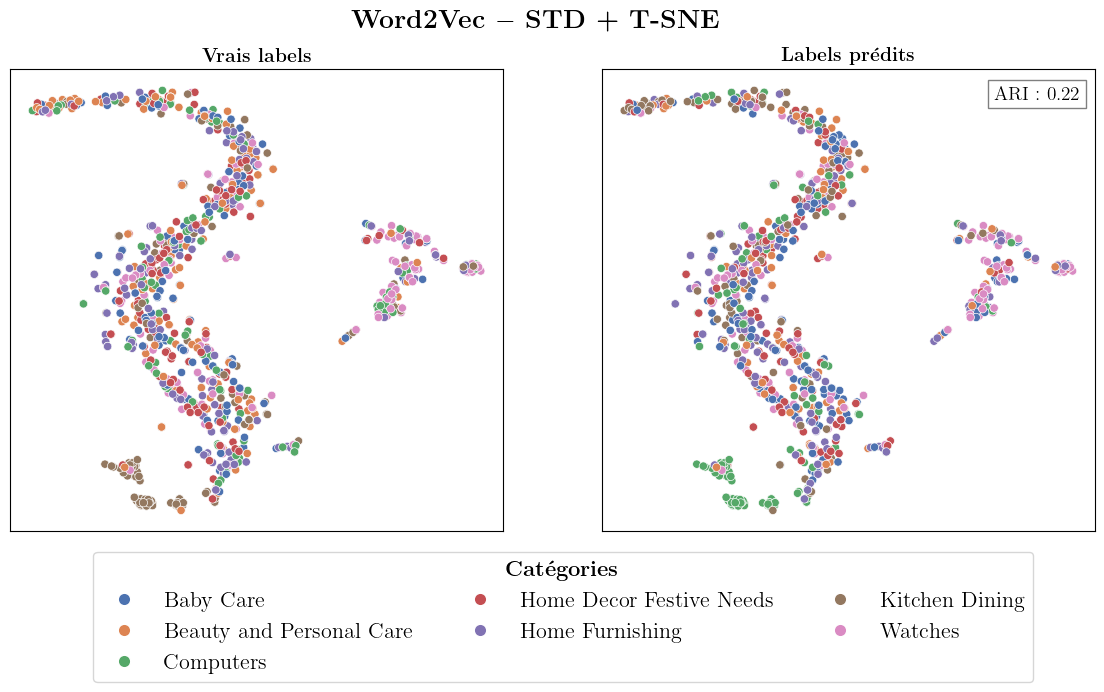

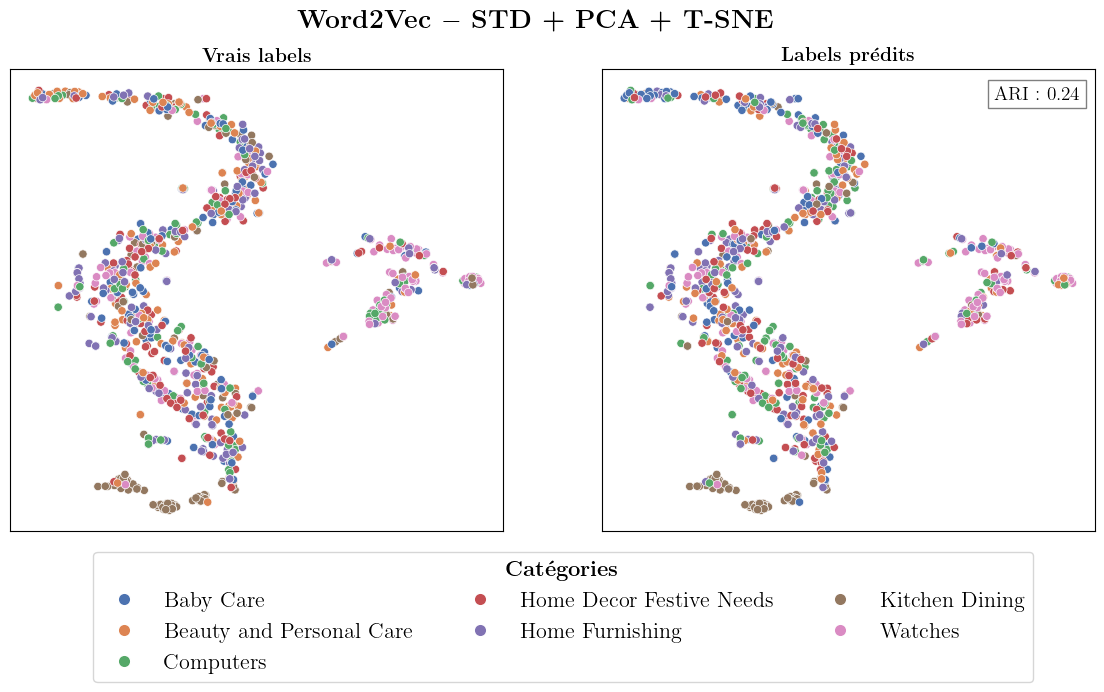

In [210]:
#On plot

for i, col in zip(range(8,12), data_tfidf_labels.columns[1:]):

    name = col.lower().replace(' ','').replace('-','').replace('+','_')
    df_name = globals()[f"df_{name}"]
    
    fig, axes = plt.subplots(1,2, figsize = (14,6), gridspec_kw={'width_ratios':[1,1]})
    sns.scatterplot(x = df_name['w2c_tsne_1'], y = df_name['w2c_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_w2c_labels['True labels'], ax = axes[0])
    sns.scatterplot(x = df_name['w2c_tsne_1'], y = df_name['w2c_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_w2c_labels[col], ax = axes[1])
    axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
    axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    axes[1].text(0.97, 0.965, f"ARI : {round(df_scores.iloc[i, 3], 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

    #légende
    category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
    plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
    plt.suptitle(f"\\textbf{{Word2Vec $-$ {col}}}")
    #plt.savefig(f"./graphics/scatter_w2c_{name}.pdf", bbox_inches='tight')
    plt.show()

#### 2.3.2 - Bert
***

In [8]:
import torch
from transformers import BertTokenizer, BertModel

In [212]:
#On instancie notre tokenizer et notre modèle
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

#les inputs
bert_inputs = bert_tokenizer.batch_encode_plus(data_texte['tokenized_description'].tolist(), return_tensors = 'pt', padding = True, truncation = True, is_split_into_words = True)

#fit du modele pour avoir les outputs
with torch.no_grad():
    outputs_bert = model_bert(**bert_inputs)
    bert_features = outputs_bert.last_hidden_state[:, 0, :].numpy()

In [214]:
#On effectue les calculs avec les différentes pipelines

for name, pipeline in pipeline_dic.items():
    
    #On récupère les dataframes
    df_name = globals()[f"df_{name}"]

    #les booléens
    is_acp = 'pca' in name
    is_std = 'std' in name
    
    if is_acp:
        pca = 'OUI'
    else:
        pca = 'NON'
        
    if is_std:
        std = 'OUI'
    else:
        std = 'NON'
    
    #applications de la pipeline
    X_bert = pipeline.fit_transform(np.array(bert_features))
    
    df_name['bert_tsne_1'] = X_bert[:,0]
    df_name['bert_tsne_2'] = X_bert[:,1]
    
    globals()[f"df_{name}"] = df_name
    
    #Kmeans
    kmeans = KMeans(n_clusters = len(df_names), n_init = 'auto', init = 'k-means++', random_state = 42)
    labels_bert = kmeans.fit_predict(X_bert)

    #On corrige les labels pour les faire correspondre
    conf_mat_bert = confusion_matrix(df_labels['true_encoded_labels'], labels_bert)
    row_bert, col_bert = linear_sum_assignment(-conf_mat_bert)
    labels_bert_reassigned = [col_bert[i] for i in labels_bert]
    
    #ARI Score
    ari_score = adjusted_rand_score(df_labels['true_labels'], labels_bert)
    
    
    #On ajoute aux dataframes
    df_labels['bert' + '_' + name] = labels_bert
    df_labels['bert' + '_' + name + '_' + 'reassigned'] = labels_bert_reassigned
    df_scores.loc[len(df_scores)] = ['BERT', std, pca, ari_score]

In [219]:
#On rassemble dans un dataframe

data_bert_labels = pd.DataFrame()
data_bert_labels['True labels'] = df_labels['true_encoded_labels']
data_bert_labels['T-SNE'] = df_labels['bert_tsne_reassigned']
data_bert_labels['PCA + T-SNE'] = df_labels['bert_pca_tsne_reassigned']
data_bert_labels['STD + T-SNE'] = df_labels['bert_std_tsne_reassigned']
data_bert_labels['STD + PCA + T-SNE'] = df_labels['bert_std_pca_tsne_reassigned']

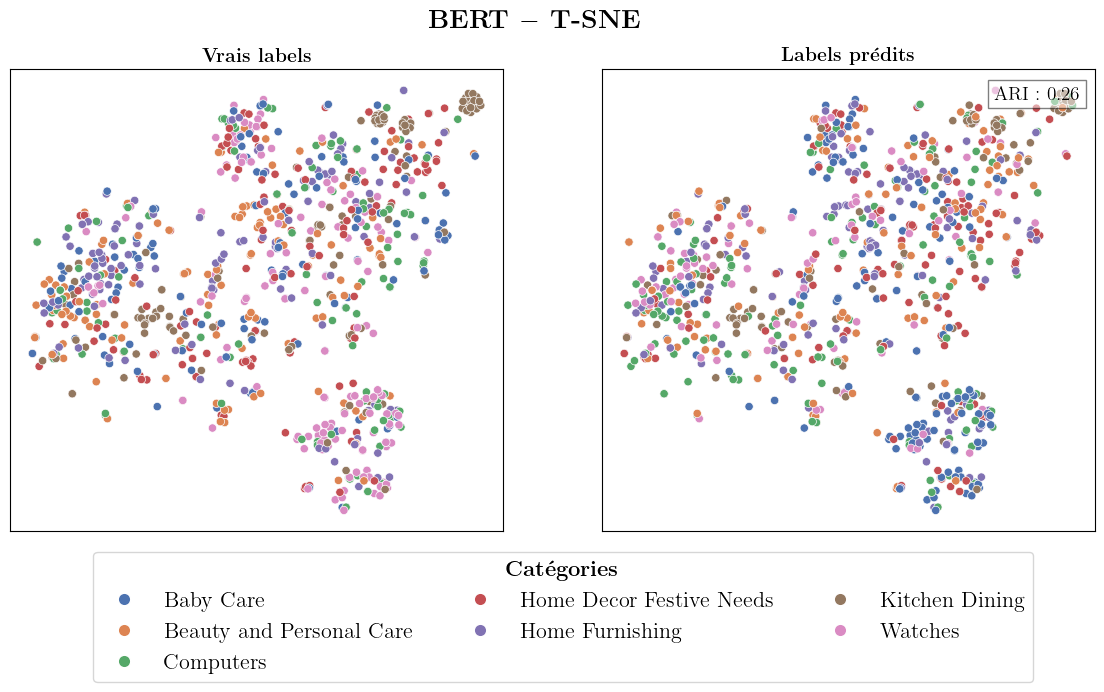

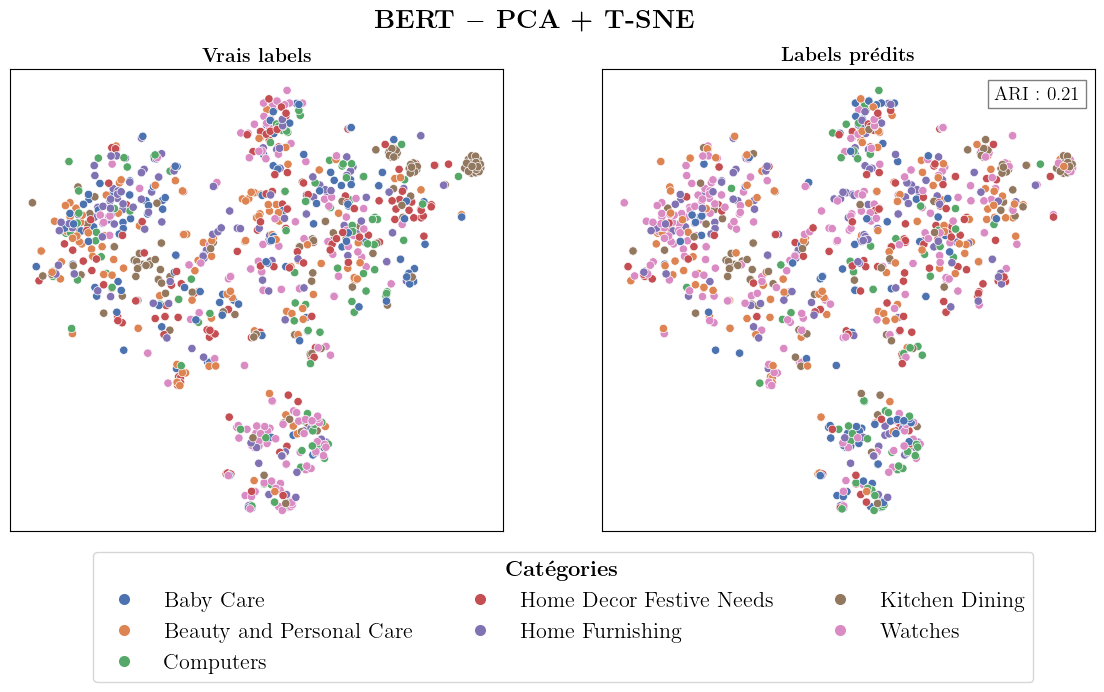

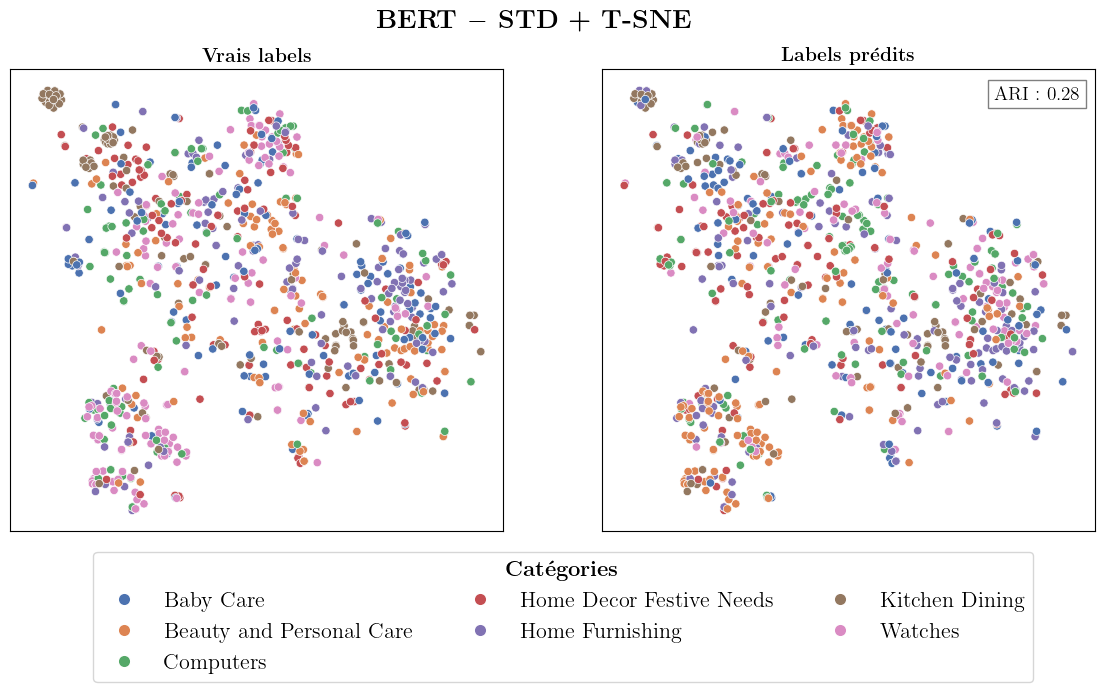

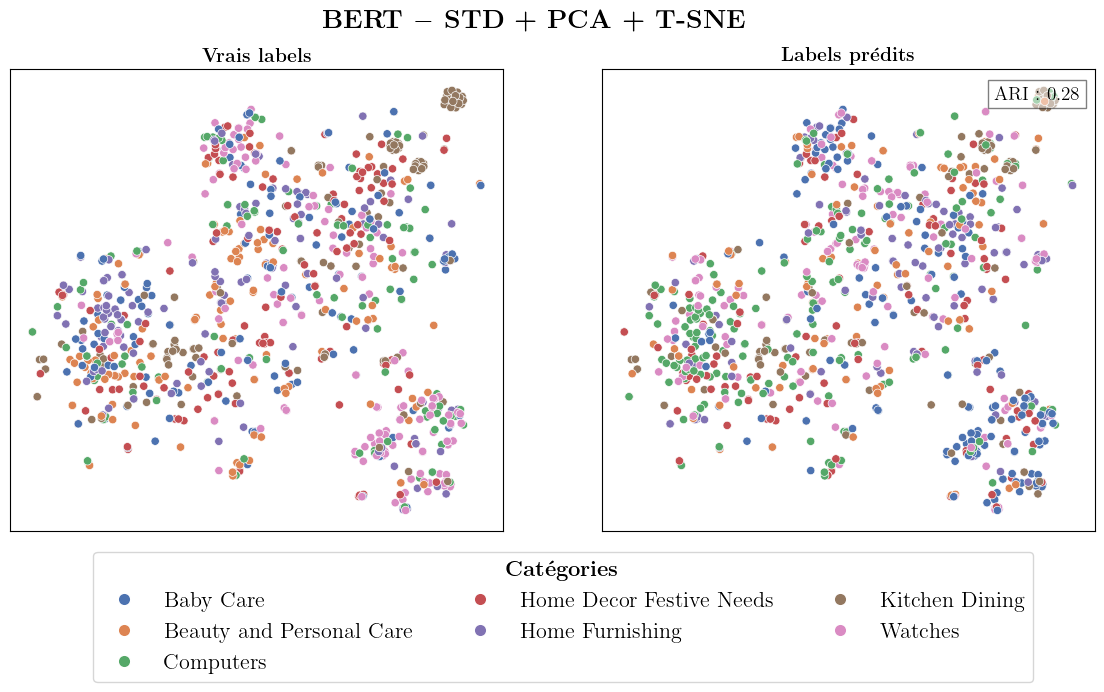

In [220]:
#On plot

for i, col in zip(range(12,16), data_bert_labels.columns[1:]):

    name = col.lower().replace(' ','').replace('-','').replace('+','_')
    df_name = globals()[f"df_{name}"]
    
    fig, axes = plt.subplots(1,2, figsize = (14,6), gridspec_kw={'width_ratios':[1,1]})
    sns.scatterplot(x = df_name['bert_tsne_1'], y = df_name['bert_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_bert_labels['True labels'], ax = axes[0])
    sns.scatterplot(x = df_name['bert_tsne_1'], y = df_name['bert_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_bert_labels[col], ax = axes[1])
    axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
    axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    axes[1].text(0.97, 0.965, f"ARI : {round(df_scores.iloc[i, 3], 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

    #légende
    category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
    plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
    plt.suptitle(f"\\textbf{{BERT $-$ {col}}}")
    #plt.savefig(f"./graphics/scatter_bert_{name}.pdf", bbox_inches='tight')
    plt.show()

#### 2.3.3 - Use
***

In [9]:
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

2024-08-06 23:59:36.986142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 23:59:37.143642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 23:59:37.175843: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 23:59:37.425750: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 23:59:39.005530: W tensorflow/compiler/tf2

In [10]:
import tensorflow_hub as hub

In [224]:
#On instancie notre modèle
model_use = hub.load("/home/adrien/devcode/python/datalib/universal_sentence_encoder")

#Les outputs 
use_outputs = model_use(data_texte["cleaned_description"].tolist())

I0000 00:00:1722891222.672414   15163 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722891222.679951   15163 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722891222.680143   15163 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722891222.681823   15163 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [227]:
#On effectue les calculs avec les différentes pipelines

for name, pipeline in pipeline_dic.items():
    
    #On récupère les dataframes
    df_name = globals()[f"df_{name}"]

    #les booléens
    is_acp = 'pca' in name
    is_std = 'std' in name
    
    if is_acp:
        pca = 'OUI'
    else:
        pca = 'NON'
        
    if is_std:
        std = 'OUI'
    else:
        std = 'NON'
    
    #applications de la pipeline
    X_use = pipeline.fit_transform(np.array(use_outputs))
    
    df_name['use_tsne_1'] = X_use[:,0]
    df_name['use_tsne_2'] = X_use[:,1]
    
    globals()[f"df_{name}"] = df_name
    
    #Kmeans
    kmeans = KMeans(n_clusters = len(df_names), n_init = 'auto', init = 'k-means++', random_state = 42)
    labels_use = kmeans.fit_predict(X_use)

    #On corrige les labels pour les faire correspondre
    conf_mat_use = confusion_matrix(df_labels['true_encoded_labels'], labels_use)
    row_use, col_use = linear_sum_assignment(-conf_mat_use)
    labels_use_reassigned = [col_use[i] for i in labels_use]
    
    #ARI Score
    ari_score = adjusted_rand_score(df_labels['true_labels'], labels_use)
    
    
    #On ajoute aux dataframes
    df_labels['use' + '_' + name] = labels_use
    df_labels['use' + '_' + name + '_' + 'reassigned'] = labels_use_reassigned
    df_scores.loc[len(df_scores)] = ['USE', std, pca, ari_score]

In [231]:
#On rassemble dans un dataframe

data_use_labels = pd.DataFrame()
data_use_labels['True labels'] = df_labels['true_encoded_labels']
data_use_labels['T-SNE'] = df_labels['use_tsne_reassigned']
data_use_labels['PCA + T-SNE'] = df_labels['use_pca_tsne_reassigned']
data_use_labels['STD + T-SNE'] = df_labels['use_std_tsne_reassigned']
data_use_labels['STD + PCA + T-SNE'] = df_labels['use_std_pca_tsne_reassigned']

In [234]:
for i, col in zip(range(16,20), data_use_labels.columns[1:]):
    ari = adjusted_rand_score(data_use_labels['True labels'], data_use_labels[col])
    print(ari)

0.43336197926091663
0.4545251896345223
0.38065160510049917
0.41806143914337046


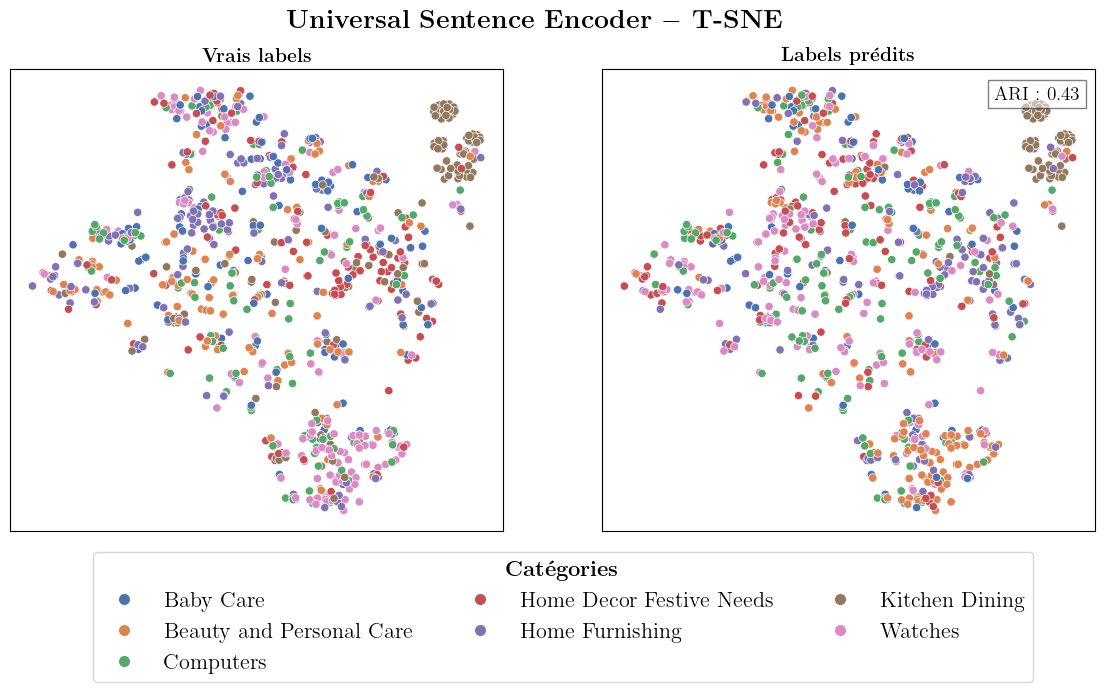

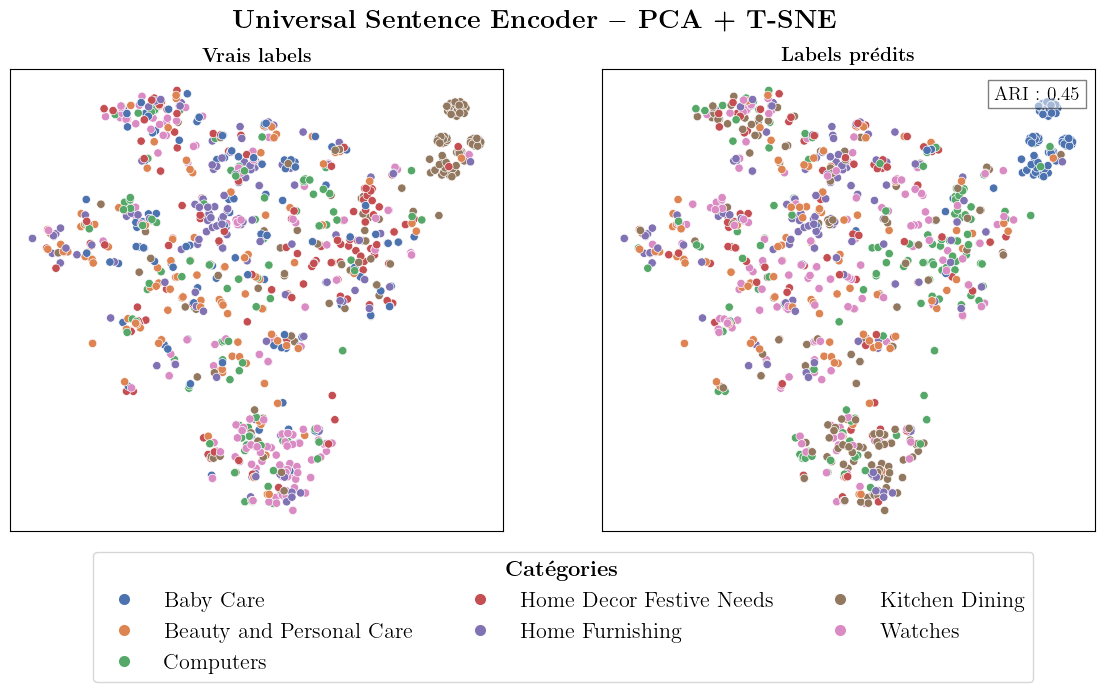

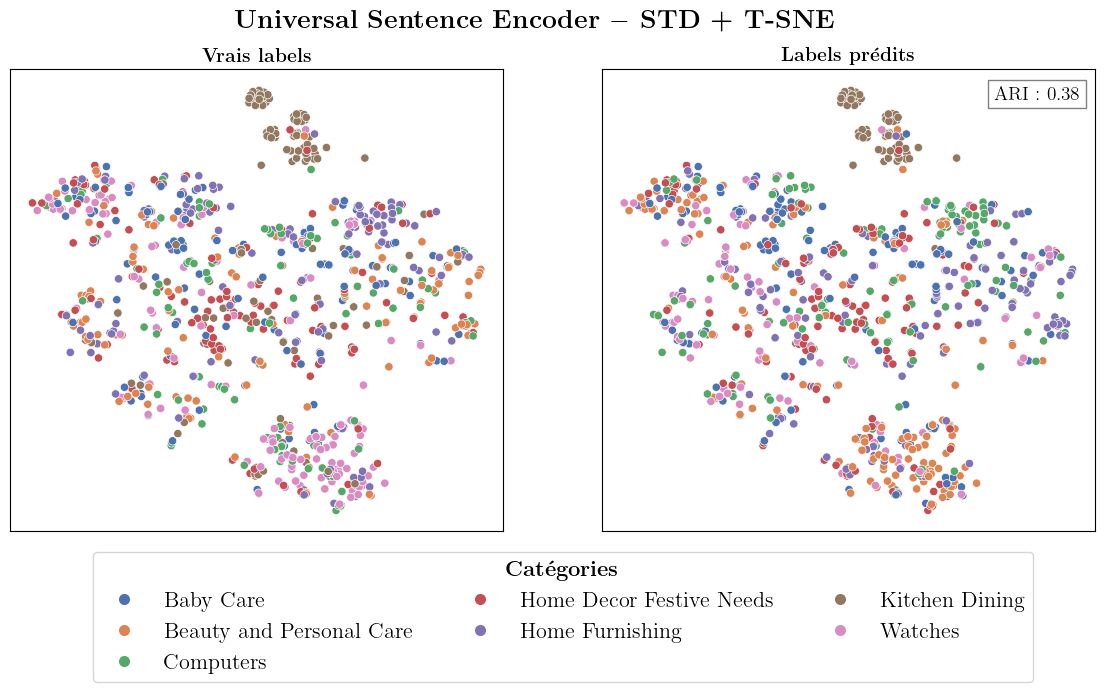

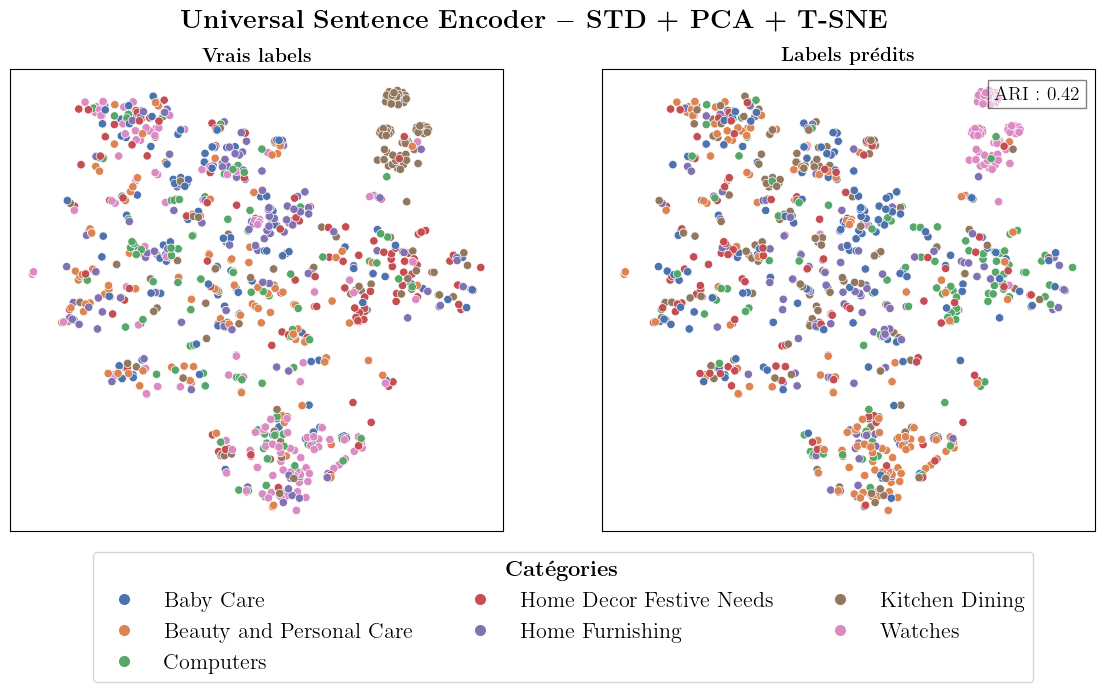

In [237]:
#On plot

for i, col in zip(range(16,20), data_use_labels.columns[1:]):

    name = col.lower().replace(' ','').replace('-','').replace('+','_')
    df_name = globals()[f"df_{name}"]
    
    fig, axes = plt.subplots(1,2, figsize = (14,6), gridspec_kw={'width_ratios':[1,1]})
    sns.scatterplot(x = df_name['use_tsne_1'], y = df_name['use_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_use_labels['True labels'], ax = axes[0])
    sns.scatterplot(x = df_name['use_tsne_1'], y = df_name['use_tsne_2'], palette = palette_deep_mapping, legend = False, hue = data_use_labels[col], ax = axes[1])
    axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
    axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    axes[1].text(0.97, 0.965, f"ARI : {round(df_scores.iloc[i, 3], 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

    #légende
    category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
    plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
    plt.suptitle(f"\\textbf{{Universal Sentence Encoder $-$ {col}}}")
    #plt.savefig(f"./graphics/scatter_use_{name}.pdf", bbox_inches='tight')
    plt.show()

## 3 - TRAITEMENT D'IMAGES
***

### 3.1 Analyse & Transformation
***

In [11]:
import cv2
from PIL import Image

In [12]:
from skimage import io, color
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.filters import median
from skimage.morphology import square
from skimage import exposure

from sklearn.preprocessing import LabelEncoder

In [17]:
#On extrait les features noms/produits/categorie

data_images = data[['uniq_id', 'product_name', 'main_category', 'image']]

In [18]:
#On introduit notre dossier images
pictures_path = 'data/images/pictures'
pictures_files = data_images['image'].tolist()

In [19]:
#Pour éviter les avertissements, on supprime la limite de pixels

Image.MAX_IMAGE_PIXELS = None

In [20]:
#on cree le répertoire ou on va stocker nos images traitées

transformed_pics_path = 'data/images/transformed_pics'

In [26]:
#On va redimensionner toutes les images en 256x256 et les mettre en noir et blanc

if not os.path.exists(transformed_pics_path):
    os.makedirs(transformed_pics_path)

for pic in pictures_files:
    pic_path = os.path.join(pictures_path, pic)
    
    #On récupère l'image
    img = Image.open(pic_path)
    
    #On la redimensionne
    resized_img = img.resize((256,256))
    
    #On la passe en niveaux de gris
    gray_img = resized_img.convert('L')
    
    #On la sauvegarde
    output_path = os.path.join(transformed_pics_path, os.path.basename(pic_path))
    gray_img.save(output_path)

In [27]:
#Distribution des niveaux de gris

mean_gray_levels = []

for pic in pictures_files:
    pic_path = os.path.join(transformed_pics_path, pic)
    
    #On ouvre l'image
    img = Image.open(pic_path)
    
    #On recupère les niveaux de gris
    gray_levels = np.array(img).flatten()
    
    #On calcule la moyenne
    mean_gray_level = gray_levels.mean()
    
    #On ajoute à la liste
    mean_gray_levels.append(mean_gray_level)

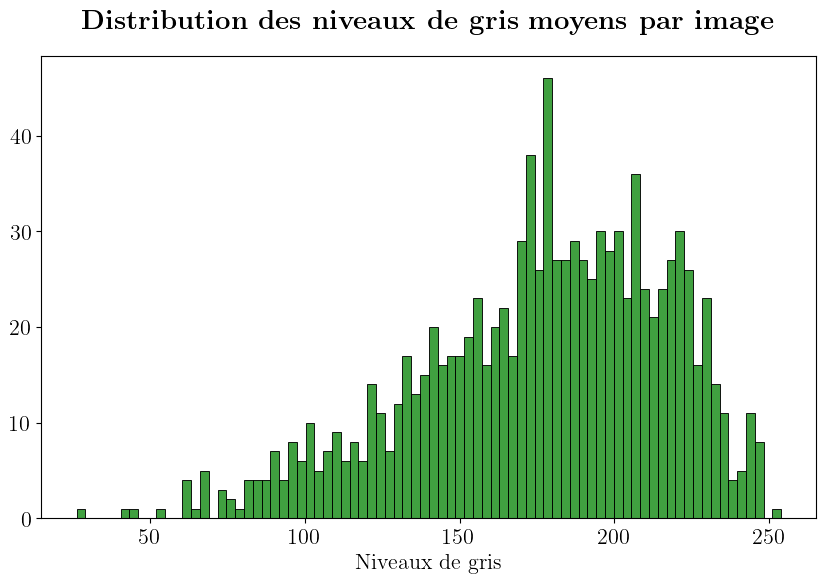

In [28]:
#On peut afficher la distribution

plt.figure(figsize = (10,6))

sns.histplot(mean_gray_levels, color = 'green', bins = 80)
plt.xlabel('Niveaux de gris')
plt.ylabel('')
plt.title("\\textbf{Distribution des niveaux de gris moyens par image", pad = 20, size = 20)
plt.savefig(f"./graphics/hist_gray_levels.pdf", bbox_inches='tight')
plt.show()

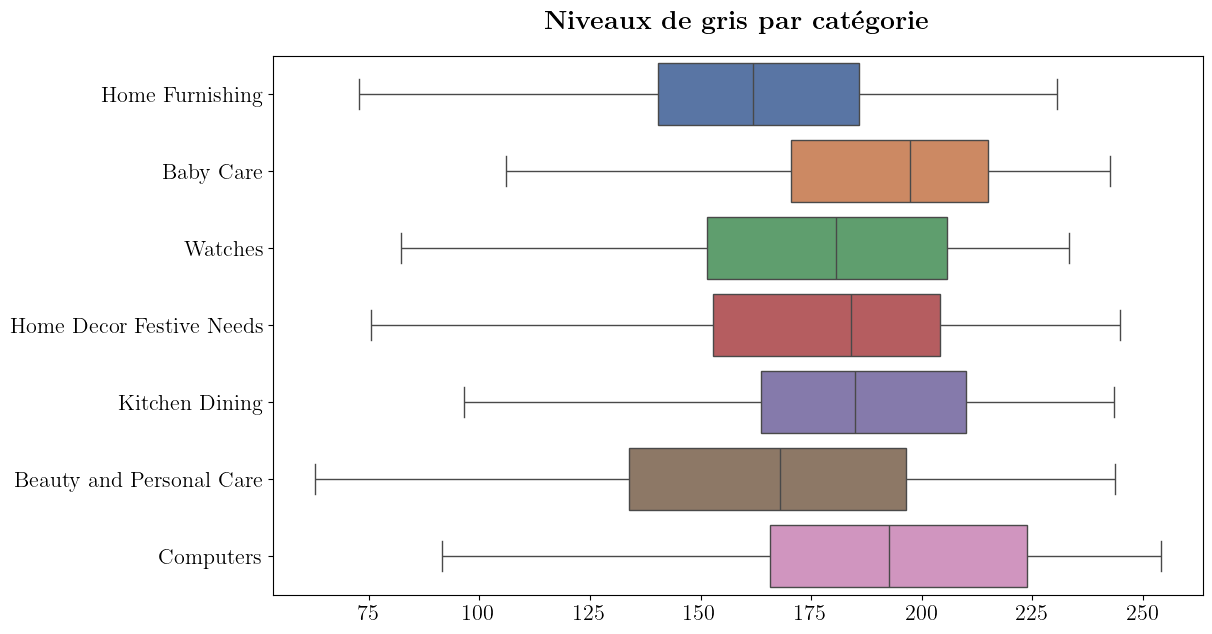

In [41]:
#On pourrait également afficher la distribution par catégorie

categories = data_images['main_category'].unique().tolist()
df_to_plot = []

for category in categories:
    cat = category.lower().replace(' ', '_')
    pictures = data_images.loc[data_images['main_category'] == category, 'image'].tolist()
    
    mean_gray_levels_cat = []
    
    for pic in pictures:
        pic_path = os.path.join(transformed_pics_path, pic)
        img = Image.open(pic_path)
    
        #On recupère les niveaux de gris
        gray_levels = np.array(img).flatten()
    
        #On calcule la moyenne
        mean_gray_level = gray_levels.mean()
    
        #On ajoute à la liste
        mean_gray_levels_cat.append(mean_gray_level)

        df_to_plot.append({'Categorie': category, 'Mean Gray Level': mean_gray_level})

    
df_for_plot = pd.DataFrame(df_to_plot)

plt.figure(figsize=(12,7))
sns.boxplot(y = 'Categorie', x = 'Mean Gray Level', showfliers = False, palette = 'deep', hue = 'Categorie', data = df_for_plot)
plt.title(f"\\textbf{{Niveaux de gris par catégorie}}", pad = 20)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f"./graphics/boxplots_gray_category.pdf", bbox_inches='tight')
plt.show()

In [21]:
equalized_path = 'data/images/equalized_pictures'

In [81]:
#egalisation

if not os.path.exists(equalized_path):
    os.makedirs(equalized_path)
    
    
for pic in pictures_files:
    pic_path = os.path.join(transformed_pics_path, pic)
    
    # Lire l'image en niveaux de gris
    image = Image.open(pic_path)
    
    #On égalise
    equalized_pic_np = exposure.equalize_hist(np.array(image))
    
    #sauvegarde des image
    equalized_pic = Image.fromarray((equalized_pic_np * 255).astype(np.uint8))
    output_path = os.path.join(equalized_path, os.path.basename(pic_path))
    equalized_pic.save(output_path)

### 3.2 - SIFT
***

In [43]:
#algorithme SIFT

sift_list_all = []

for pic in pictures_files:
    pic_path = os.path.join(equalized_path, pic)

    #on lit l'image et on initialise sift
    img = cv2.imread(pic_path)
    sift = cv2.SIFT_create()

    #on extrait les descripteurs
    points, vectors = sift.detectAndCompute(img, None)
    sift_img = np.asarray(vectors)
    
    #on ajoute a la liste
    sift_list_all.append(sift_img)

#On passe en array
sift_list_all = np.concatenate(sift_list_all, axis = 0)

print("Nombre de descripteurs total :", sift_list_all.shape[0])

Nombre de descripteurs total : 475884


In [46]:
#On peut maintenant appliquer le Kmeans

nb_desc_all = len(sift_list_all)
k = int(round(np.sqrt(nb_desc_all), 0))

print("Nombre de clusters optimal estimé :", k)

start_time = time.time()

#Initialisation du kmeans (on utilisera minibatch pour le temps de calcul réduit)
kmeans = KMeans(n_clusters = k, n_init = 'auto', init = 'k-means++', random_state = 42)
kmeans.fit(sift_list_all)

end_time = time.time()

#Temps de calcul
duration = end_time - start_time
print("Temps de traitement du KMeans :", round(duration,2), "secondes")

Nombre de clusters optimal estimé : 690
Temps de traitement du KMeans : 150.64 secondes


In [47]:
#creation d'une fonction pour build les histogrammes des images
def hist_build(kmeans, descriptor, pic):
    res = kmeans.predict(descriptor)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_descriptors = len(descriptor)

    if nb_descriptors == 0:
        print("Problème histogramme")
    for i in res:
        hist[i] += 1.0/nb_descriptors
    return hist

In [48]:
df_sift = pd.DataFrame(columns = [f"C{i}" for i in range(1,691)])

for pic in pictures_files:
    pic_path = os.path.join(equalized_path, pic)

    #on lit l'image et on initialise sift
    img = cv2.imread(pic_path)
    sift = cv2.SIFT_create()

    #on extrait les descripteurs
    points, vectors = sift.detectAndCompute(img, None)
    hist = hist_build(kmeans,vectors,img)

    #On ajoute au dataframe
    df_sift.loc[len(df_sift)] = hist

print("Taille du dataset :", df_sift.shape)

Taille du dataset : (1050, 690)


In [49]:
df_sift.head()

C1        C2        C3        C4        C5        C6        C7  \
0  0.000000  0.000000  0.000000  0.000000  0.001908  0.001908  0.007634   
1  0.002481  0.000000  0.000000  0.004963  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.001214  0.003641  0.001214  0.002427  0.002427   
3  0.000000  0.000000  0.000000  0.000000  0.001133  0.001133  0.002265   
4  0.016949  0.002608  0.000000  0.001304  0.000000  0.000000  0.000000   

         C8        C9       C10  ...      C681      C682      C683      C684  \
0  0.001908  0.022901  0.001908  ...  0.003817  0.000000  0.000000  0.003817   
1  0.000000  0.002481  0.000000  ...  0.002481  0.004963  0.000000  0.000000   
2  0.004854  0.000000  0.000000  ...  0.001214  0.000000  0.000000  0.000000   
3  0.000000  0.003398  0.000000  ...  0.011325  0.005663  0.003398  0.000000   
4  0.001304  0.000000  0.000000  ...  0.000000  0.000000  0.001304  0.005215   

       C685      C686      C687      C688      C689      C690  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.009926  0.002481  0.002481  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.002427  0.000000  0.001214  0.004854  
3  0.006795  0.000000  0.001133  0.000000  0.001133  0.000000  
4  0.001304  0.000000  0.001304  0.001304  0.000000  0.001304  

[5 rows x 690 columns]

In [42]:
#On instancie une pca et un tsne
pca = PCA(n_components = 0.99)
tsne = TSNE(n_components = 2, perplexity = 30, init = 'random', random_state=42)

In [51]:
#on applique les transformations
X_sift = df_sift.values
X_sift_pca = pca.fit_transform(X_sift)
X_sift_tsne = tsne.fit_transform(X_sift_pca)

print("Dimensions du dataset initial :", X_sift.shape)
print("Dimensions du dataset après PCA :", X_sift_pca.shape)
print("Dimensions du dataset après TSNE :", X_sift_tsne.shape)

Dimensions du dataset initial : (1050, 690)
Dimensions du dataset après PCA : (1050, 537)
Dimensions du dataset après TSNE : (1050, 2)


In [52]:
#On reeffectue un Kmeans avec n = 7

kmeans_tsne = KMeans(n_clusters = data['main_category'].unique().shape[0], n_init = 'auto', init = 'k-means++', random_state = 42)
sift_tsne_labels = kmeans_tsne.fit_predict(X_sift_tsne)

sift_ari_score = adjusted_rand_score(data['main_category'], sift_tsne_labels)

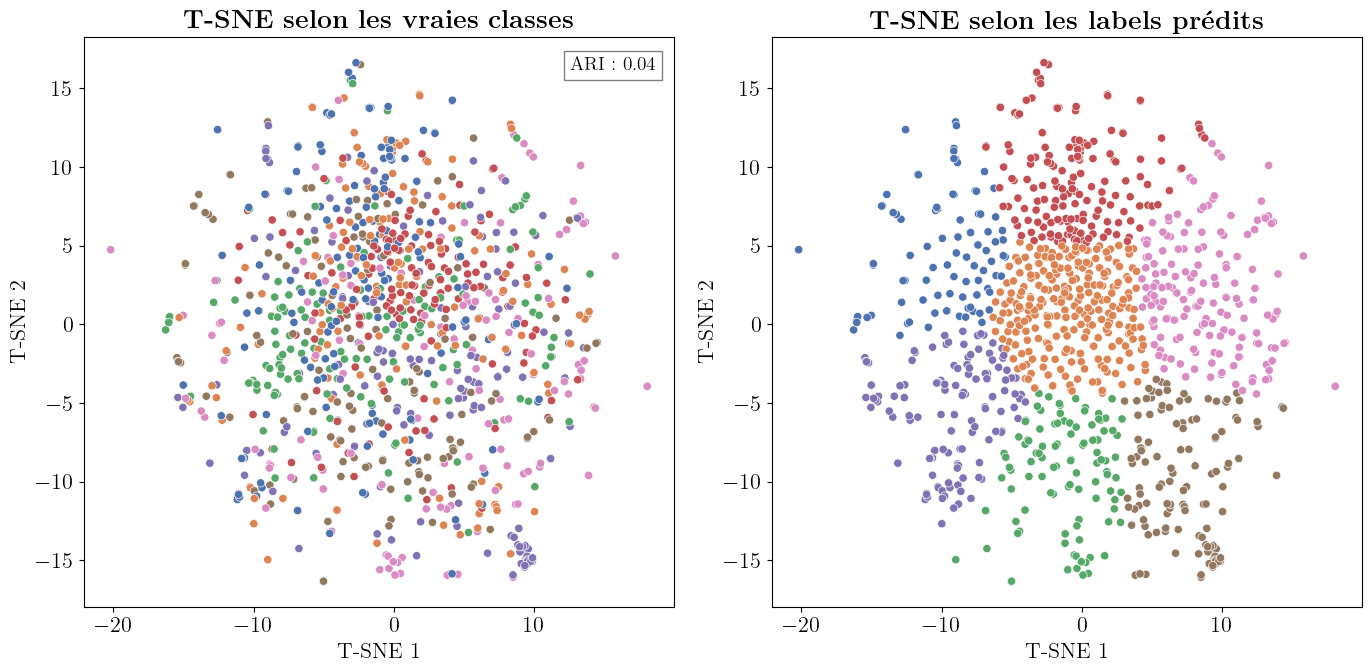

In [55]:
#On plot

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Premier subplot : t-SNE avec vraies catégories
sns.scatterplot(x=X_sift_tsne[:,0], y=X_sift_tsne[:,1], hue=data_images['main_category'], palette='deep', legend=False, ax=axes[0])
axes[0].set_xlabel('T-SNE 1')
axes[0].set_ylabel('T-SNE 2')
axes[0].set_title(f"\\textbf{{T-SNE selon les vraies classes}}")
axes[0].text(0.97, 0.965, f"ARI : {round(sift_ari_score, 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[0].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Deuxième subplot : t-SNE avec labels des clusters SIFT
sns.scatterplot(x=X_sift_tsne[:,0], y=X_sift_tsne[:,1], hue=sift_tsne_labels, palette='deep', legend=False, ax=axes[1])
axes[1].set_xlabel('T-SNE 1')
axes[1].set_ylabel('T-SNE 2')
axes[1].set_title(f"\\textbf{{T-SNE selon les labels prédits}}")

plt.savefig(f"./graphics/scatter_sift.pdf", bbox_inches='tight')

plt.tight_layout()
plt.show()

### 3.3 - VGG-16
***

In [22]:
from keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [38]:
from tensorflow.keras.models import Model

In [39]:
#on va maintenant retirer la derniere couche (la couche fully connected de classification)

vgg_16 = VGG16()
model_feat = Model(inputs=vgg_16.inputs, outputs=vgg_16.layers[-2].output)

print(model_feat.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
#on peut extraire les features de nos images

pic_features = []

for pic in pic_paths_list:
    picture = load_img(pic, target_size=(224, 224)) #on charge
    picture = img_to_array(picture) #on la passe en array
    
    picture = np.expand_dims(picture, axis=0) 
    preprocessed_picture = preprocess_input(picture)
    
    pic_features.append(model_feat.predict(preprocessed_picture, verbose=0)[0]) #on sort la prédiction

#On transforme la liste en array
pic_features_array = np.asarray(pic_features)

print('-' * 40)
print("Dimensions :")
print(pic_features_array.shape[0], "lignes")
print(pic_features_array.shape[1], "colonnes")
print('-'*40)

2024-08-07 00:13:21.243849: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 8 bytes spill stores, 8 bytes spill loads



----------------------------------------
Dimensions :
1050 lignes
4096 colonnes
----------------------------------------


In [43]:
#réduction de dimension pca + tsne

X_vgg_pca = pca.fit_transform(pic_features_array)

print('-' * 40)
print("Dimensions après ACP :", X_vgg_pca.shape)
print('-' * 40)

start = time.time()
X_vgg_tsne = tsne.fit_transform(X_vgg_pca)
duree = time.time() - start

print("Temps de TSNE :", round(duree,2), "secondes")
print('-' * 40)

----------------------------------------
Dimensions après ACP : (1050, 788)
----------------------------------------
Temps de TSNE : 4.25 secondes
----------------------------------------


In [44]:
#on effectue un kmeans
kmeans_vgg = KMeans(n_clusters = len(data_images['mce'].unique().tolist()), n_init = 'auto', init = 'k-means++', random_state = 42)

start = time.time()
vgg_labels = kmeans_vgg.fit_predict(X_vgg_tsne)
duree = round(time.time() - start,2)

print('-' * 40)
print("Temps de KMeans :", duree, "secondes")
print('-' * 40)

vgg_ari_score = adjusted_rand_score(data_images['mce'], vgg_labels)

----------------------------------------
Temps de KMeans : 0.01 secondes
----------------------------------------


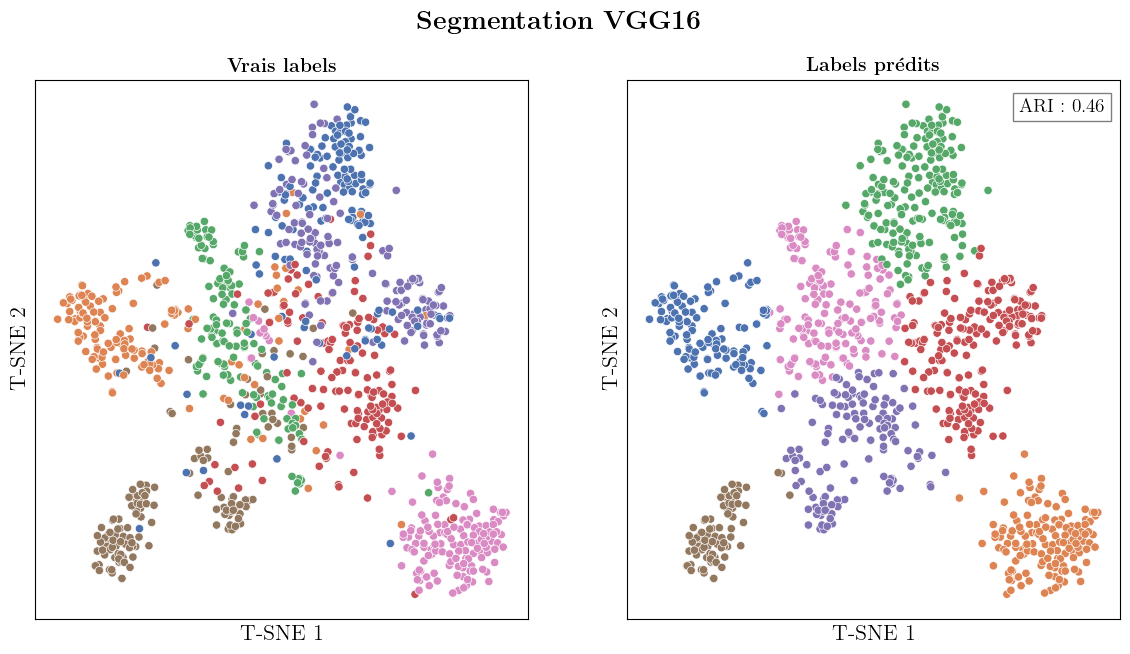

In [94]:
fig, axes = plt.subplots(1,2, figsize = (14,7), gridspec_kw={'width_ratios':[1,1]})
sns.scatterplot(x = X_vgg_tsne[:,0], y = X_vgg_tsne[:,1], hue = data_images['mce'], palette = palette_deep_mapping, legend = False, ax = axes[0])
sns.scatterplot(x = X_vgg_tsne[:,0], y = X_vgg_tsne[:,1], hue = vgg_labels, palette = palette_deep_mapping, legend = False, ax = axes[1])
axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

axes[0].set_xlabel('T-SNE 1')
axes[0].set_ylabel('T-SNE 2')
axes[0].set_xticks([])
axes[0].set_yticks([])
    
axes[1].set_xlabel('T-SNE 1')
axes[1].set_ylabel('T-SNE 2')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[1].text(0.97, 0.965, f"ARI : {round(vgg_ari_score, 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

#légende
#category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
#plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.45), ncol=3)
    
plt.suptitle(f"\\textbf{{Segmentation VGG16}}")
plt.savefig(f"./graphics/scatter_vgg.pdf", bbox_inches='tight')
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
#une fonction pour reassocier les vrais labels avec les labels prédits 

def conf_mat_transform(y_true,y_pred) :
    conf_mat = confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print('-' * 70)
    print ("Correspondance des clusters : ", corresp)
    print('-' * 70)
    
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [88]:
#on transforme les labels pour afficher la matrice de confusion
kmeans_labels_transformed = conf_mat_transform(data_images['mce'].tolist(), vgg_labels)

----------------------------------------------------------------------
Correspondance des clusters :  [1 6 0 3 5 5 2]
----------------------------------------------------------------------


In [89]:
#on regle le probleme du double 5

correspondance = [1,6,0,3,4,5,2]
kmeans_labels_transformed_2 = [correspondance[i] for i in vgg_labels]

In [90]:
#on peut afficher la matrice de confusion
conf_matrice = confusion_matrix(data_images['mce'].tolist(), kmeans_labels_transformed_2)
print('-' * 70)
print(' ' * 5)
print("Matrice de confusion :")
print(' ' * 5)
print(conf_matrice)
print('_' * 70)
print('-'*70)

print(classification_report(data_images['mce'], kmeans_labels_transformed_2))
print('-'*70)

----------------------------------------------------------------------
     
Matrice de confusion :
     
[[106   4  12  19   6   2   1]
 [  3 114  16   2  14   0   1]
 [  0   0 102   0  47   0   1]
 [  6   1  18  94  27   0   4]
 [ 76   0   5  69   0   0   0]
 [  0   7   6   2  55  80   0]
 [  0   0  10   0   2   0 138]]
______________________________________________________________________
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.71      0.62       150
           1       0.90      0.76      0.83       150
           2       0.60      0.68      0.64       150
           3       0.51      0.63      0.56       150
           4       0.00      0.00      0.00       150
           5       0.98      0.53      0.69       150
           6       0.95      0.92      0.94       150

    accuracy                           0.60      1050
   macro avg       0.64      0.60      0.61   

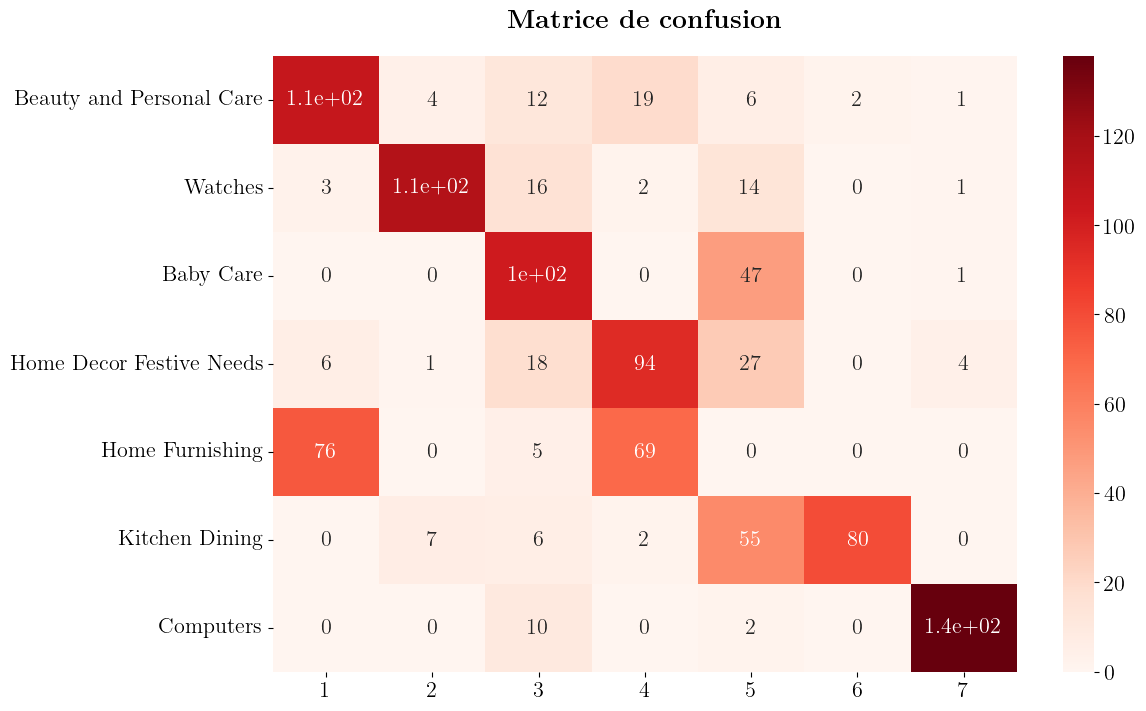

In [112]:
#On affiche avec une carte de chaleur
df_confusion = pd.DataFrame(conf_matrice, index = label_encoder.inverse_transform(correspondance).tolist(), columns = [1, 2, 3, 4, 5, 6, 7])

plt.figure(figsize = (12,8))
sns.heatmap(df_confusion, annot = True, cmap = 'Reds')
plt.title(f"\\textbf{{Matrice de confusion}}", pad = 20)
plt.show()

In [91]:
print('-'*40)
print("Classe la mieux prédite : 'Computers'")
print("Classe la moins bien prédite : 'Home Fursnishing'")
print('-'*40)

----------------------------------------
Classe la mieux prédite : 'Computers'
Classe la moins bien prédite : 'Home Fursnishing'
----------------------------------------


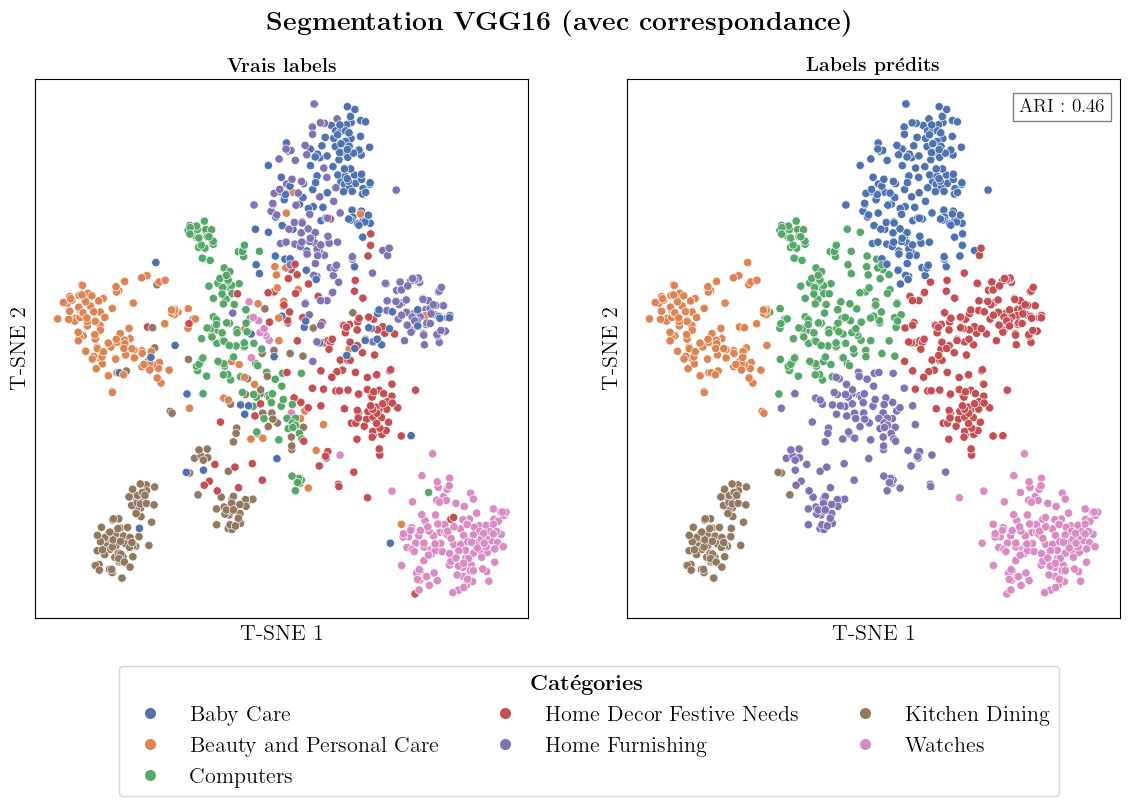

In [97]:
#on plot avec les correspondances réglées

fig, axes = plt.subplots(1,2, figsize = (14,7), gridspec_kw={'width_ratios':[1,1]})
sns.scatterplot(x = X_vgg_tsne[:,0], y = X_vgg_tsne[:,1], hue = data_images['mce'], palette = palette_deep_mapping, legend = False, ax = axes[0])
sns.scatterplot(x = X_vgg_tsne[:,0], y = X_vgg_tsne[:,1], hue = kmeans_labels_transformed_2, palette = palette_deep_mapping, legend = False, ax = axes[1])

axes[0].set_title("\\textbf{{Vrais labels}}", size = 14)
axes[1].set_title("\\textbf{{Labels prédits}}", size = 14)

axes[0].set_xlabel('T-SNE 1')
axes[0].set_ylabel('T-SNE 2')
axes[0].set_xticks([])
axes[0].set_yticks([])
    
axes[1].set_xlabel('T-SNE 1')
axes[1].set_ylabel('T-SNE 2')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[1].text(0.97, 0.965, f"ARI : {round(vgg_ari_score, 2)}", horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

#légende
category_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_deep_mapping[i], markersize=9, label=category_names[i]) for i in range(len(category_names))]
plt.legend(handles=handles, title="\\textbf{{Catégories}}", loc='lower center', bbox_to_anchor=(-0.078, -0.35), ncol=3)
    
plt.suptitle(f"\\textbf{{Segmentation VGG16 (avec correspondance)}}")
plt.savefig(f"./graphics/scatter_vgg_corresp.pdf", bbox_inches='tight')
plt.show()



In [115]:
#On sauvegarde notre data data_images pour l'utiliser dans le notebook classification

data_images.to_csv('data/data_classification', index = False)

### 3.4 - ImageNet
***

In [23]:
#On instancie notre modèle de base
base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(224,224,3))

I0000 00:00:1722981663.288067    4748 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722981663.294941    4748 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722981663.295135    4748 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722981663.297075    4748 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [24]:
#bloquer les couches préentrainées
for layer in base_model.layers:
    layer.trainable  = False

In [25]:
transformed_pics_path = 'data/images/transformed_pics'
vgg_16_pics_path = 'data/images/vgg_16_pics'

In [26]:
#on va reshape les images en 224x224

if not os.path.exists(vgg_16_pics_path):
    os.makedirs(vgg_16_pics_path)

for pic in pictures_files:
    pic_path = os.path.join(transformed_pics_path, pic)
    
    #On récupère l'image
    img = Image.open(pic_path)
    
    #On la redimensionne
    resized_img = img.resize((224,224))
    
    #On la sauvegarde
    output_path = os.path.join(vgg_16_pics_path, os.path.basename(pic_path))
    resized_img.save(output_path)

In [27]:
#on encode nos catégories 

label_encoder = LabelEncoder()
data_images.loc[:,'mce'] = label_encoder.fit_transform(data_images.loc[:,'main_category']) #mce pour main category encoded

/tmp/ipykernel_4748/705495257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_images.loc[:,'mce'] = label_encoder.fit_transform(data_images.loc[:,'main_category']) #mce pour main category encoded


In [28]:
#on cree une fonction pour preprocess les images

def preprocessing_pic(pic_path):
        
    img = load_img(pic_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_preprocessed = preprocess_input(img_array)

    return img_preprocessed

In [29]:
#on cree une liste contenant tous les chemins des images
pic_paths_list = []

for pic in pictures_files:
    pic_path = os.path.join(vgg_16_pics_path, pic)
    pic_paths_list.append(pic_path)

In [30]:
#on peut maintenant creer nos données

X = np.array([preprocessing_pic(pic_path) for pic_path in pic_paths_list])
y = data_images['mce']

In [31]:
#on divise les données en ensemble d'entraiement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [34]:
#on l'entraine sur plusieurs valeurs de paramètres

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

epochs_list = [10, 20]
batch_size_list = [16, 32, 64]

loss_list = []
accuracy_list = []

results_list = []

for epoch in epochs_list:
    for batch in batch_size_list:

        model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(len(np.unique(y_train)), activation = 'softmax') #couche de sortie
        ])
        
        print('-' * 52)
        print(f"Entrainement avec 'epochs' = {epoch} et 'batch_size' = {batch}")
        print('-' * 52)

        #on le compile
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

        #on l'entraine
        training = model.fit(X_train, y_train, epochs = epoch, batch_size = batch, validation_data = (X_test, y_test), verbose = 1)

        #on l'évalue
        loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

        #on ajoute aux listes
        loss_list.append(loss)
        accuracy_list.append(accuracy)

        results_list.append({
            'epochs': epoch,
            'batch_size': batch,
            'loss': loss,
            'accuracy': accuracy,
            'history': training.history
        })

        print('-' * 52)
        print(f"Loss = {loss}")
        print(f"Accuracy = {accuracy}")
        print('-' * 52)
        print('_' * 52)

----------------------------------------------------
Entrainement avec 'epochs' = 10 et 'batch_size' = 16
----------------------------------------------------
Epoch 1/10


I0000 00:00:1722981761.904584    5238 service.cc:146] XLA service 0x745680011890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722981761.904631    5238 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-08-07 00:02:41.997308: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-07 00:02:42.289587: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
2024-08-07 00:02:42.608923: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_849', 8 bytes spill stores, 8 bytes spill loads



 5/53 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1829 - loss: 25.9461

I0000 00:00:1722981767.229952    5238 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4898 - loss: 14.3245

2024-08-07 00:02:49.854270: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_849', 8 bytes spill stores, 8 bytes spill loads



53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4950 - loss: 14.0705

2024-08-07 00:02:54.338284: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 8 bytes spill stores, 8 bytes spill loads



53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.4974 - loss: 13.9505 - val_accuracy: 0.5905 - val_loss: 4.5232
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8461 - loss: 1.7893 - val_accuracy: 0.8238 - val_loss: 2.2636
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9328 - loss: 0.4458 - val_accuracy: 0.7476 - val_loss: 2.3407
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9698 - loss: 0.1244 - val_accuracy: 0.7905 - val_loss: 2.4153
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9881 - loss: 0.0917 - val_accuracy: 0.7762 - val_loss: 2.7023
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9788 - loss: 0.1517 - val_accuracy: 0.8143 - val_loss: 2.1634
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9717 - loss: 0.2790 - val_accuracy: 0.8190 - val_loss: 2.9050
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9799 - loss: 0.1055 - val_accuracy: 0.8524 - val_loss:

2024-08-07 00:03:28.160051: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1381', 32 bytes spill stores, 32 bytes spill loads

2024-08-07 00:03:28.175635: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1381', 36 bytes spill stores, 40 bytes spill loads

2024-08-07 00:03:28.200492: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1383', 36 bytes spill stores, 40 bytes spill loads



27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.4475 - loss: 11.3218 - val_accuracy: 0.7476 - val_loss: 2.7297
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8863 - loss: 1.1380 - val_accuracy: 0.7714 - val_loss: 3.1488
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9397 - loss: 0.5884 - val_accuracy: 0.7667 - val_loss: 3.1277
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9747 - loss: 0.1763 - val_accuracy: 0.8190 - val_loss: 2.4233
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9862 - loss: 0.0556 - val_accuracy: 0.8238 - val_loss: 2.3730
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9951 - loss: 0.0386 - val_accuracy: 0.8143 - val_loss: 2.4590
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 1.0000 - loss: 7.7268e-04 - val_accuracy: 0.8333 - val_loss: 2.3116
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 1.0000 - loss: 1.1758e-05 - val_accuracy: 0.8333 - va

2024-08-07 00:03:57.348556: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1381', 436 bytes spill stores, 436 bytes spill loads

2024-08-07 00:03:57.350126: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1383', 436 bytes spill stores, 436 bytes spill loads

2024-08-07 00:03:57.395749: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1381', 436 bytes spill stores, 436 bytes spill loads

2024-08-07 00:03:57.696678: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1383', 436 bytes spill stores, 436 bytes spill loads

2024-08-07 00:03:58.500768: W external/local_tsl/tsl

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 363ms/step - accuracy: 0.3554 - loss: 19.0832 - val_accuracy: 0.7333 - val_loss: 4.3037
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.8562 - loss: 1.6733 - val_accuracy: 0.7905 - val_loss: 2.4460
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9504 - loss: 0.2630 - val_accuracy: 0.8143 - val_loss: 2.7165
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9443 - loss: 0.4700 - val_accuracy: 0.7952 - val_loss: 3.0613
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9876 - loss: 0.1076 - val_accuracy: 0.8190 - val_loss: 3.1168
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.9892 - loss: 0.0539 - val_accuracy: 0.8286 - val_loss: 3.0853
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9972 - loss: 0.0214 - val_accuracy: 0.8190 - val_loss: 3.1236
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9799 - loss: 0.1273 - val_accuracy: 0.8048 - va

In [36]:
#On stocke dans un dataframe

df_results_vgg = pd.DataFrame()
df_results_vgg['epochs'] = [10, 10, 10, 20, 20, 20]
df_results_vgg['batch_size'] = [16, 32, 64, 16, 32, 64]
df_results_vgg['loss'] = [round(loss, 2) for loss in loss_list]
df_results_vgg['accuracy'] = [round(accuracy, 2) for accuracy in accuracy_list]

df_results_vgg

epochs  batch_size  loss  accuracy
0      10          16  3.04      0.80
1      10          32  2.30      0.83
2      10          64  3.40      0.84
3      20          16  4.76      0.83
4      20          32  2.66      0.81
5      20          64  2.32      0.86

In [101]:
#on sauvegarde
df_results_vgg.to_csv('data/resultats_cnn', index = False)